# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [2]:
# импортируем необходимые библиотеки и настроим окружение.
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

In [3]:
# считаем данные из csv-файла в датафрейм и сохраним в переменной data.
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv',sep='\t')

Ознакомимся с данными: напечатаем 5 строк тыблицы, выведем информацию по столбцам,построим
диаграммы.

In [4]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

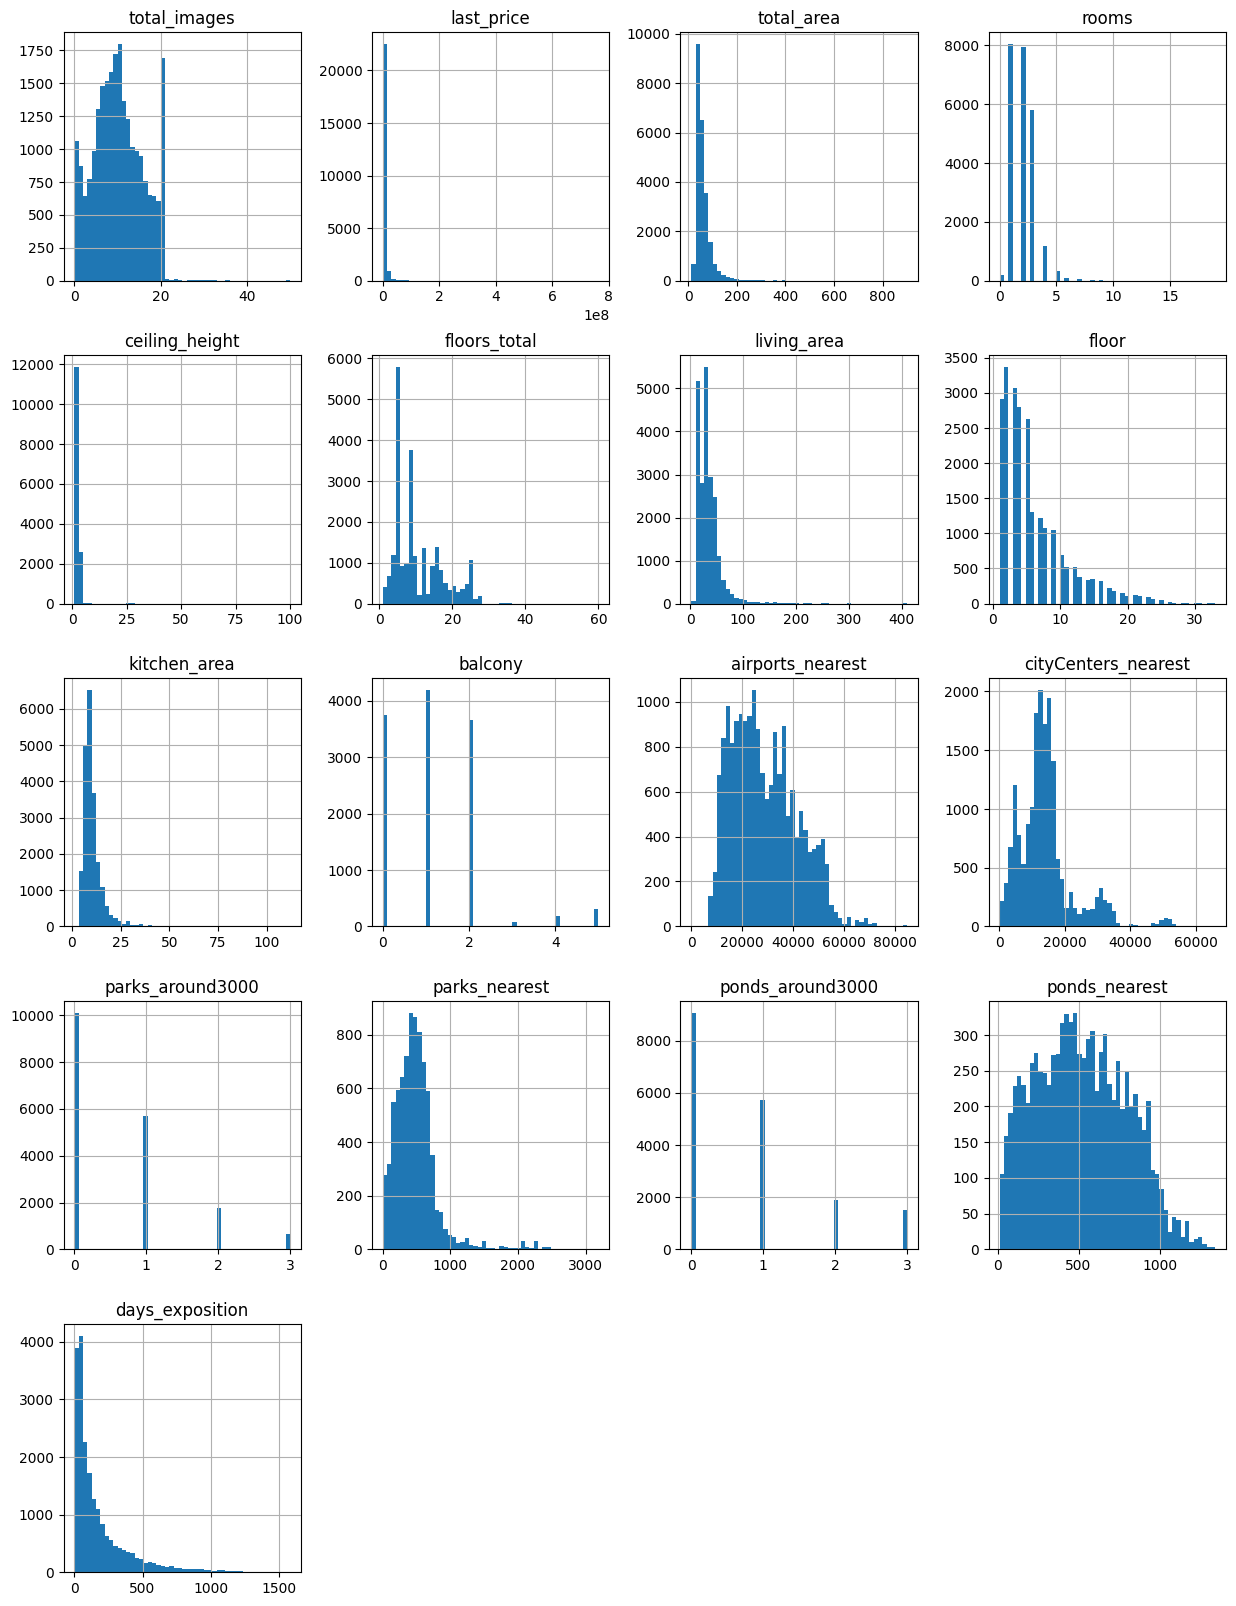

In [6]:
data.hist(figsize=(15,20),bins=50)
plt.savefig('example_plot.png', format='png', dpi=300)
plt.show()

Предварительные воводы: 
1. В таблице 23699 строк, что достаточно для проведения исследования.
2. В данных есть пропуски
3. В столбце ` is_apartment`тип данных не соответствует заявленному.
4. Аномальные значения в столбцах`ceiling_height`,`last_price`.

Данные требуют предобработки и изучения.

Пересортируем столбцы  в удобном для восприятия следующем порядке:
1. Столбцы с характеристиками жилья.
2. Столбцы с параметрами локации.
3. Данные об объявлении о продаже.

Переведем названия столбцов в строчный формат.

In [7]:
new_column =['last_price','rooms','total_area','living_area','kitchen_area','floor','balcony',\
'ceiling_height','floors_total','is_apartment','studio','open_plan','locality_name',\
  'cityCenters_nearest','airports_nearest','parks_around3000','parks_nearest','ponds_around3000',\
 'ponds_nearest','first_day_exposition', 'days_exposition','total_images']
data=data[new_column]
data.columns = data.columns.str.lower()
data.head()      

last_price  rooms  total_area  living_area  kitchen_area  floor  balcony  \
0  13000000.0      3       108.0         51.0          25.0      8      NaN   
1   3350000.0      1        40.4         18.6          11.0      1      2.0   
2   5196000.0      2        56.0         34.3           8.3      4      0.0   
3  64900000.0      3       159.0          NaN           NaN      9      0.0   
4  10000000.0      2       100.0         32.0          41.0     13      NaN   

   ceiling_height  floors_total is_apartment  studio  open_plan  \
0            2.70          16.0          NaN   False      False   
1             NaN          11.0          NaN   False      False   
2             NaN           5.0          NaN   False      False   
3             NaN          14.0          NaN   False      False   
4            3.03          14.0          NaN   False      False   

     locality_name  citycenters_nearest  airports_nearest  parks_around3000  \
0  Санкт-Петербург              16028.0           18863.0               1.0   
1   посёлок Шушары              18603.0           12817.0               0.0   
2  Санкт-Петербург              13933.0           21741.0               1.0   
3  Санкт-Петербург               6800.0           28098.0               2.0   
4  Санкт-Петербург               8098.0           31856.0               2.0   

   parks_nearest  ponds_around3000  ponds_nearest first_day_exposition  \
0          482.0               2.0          755.0  2019-03-07T00:00:00   
1            NaN               0.0            NaN  2018-12-04T00:00:00   
2           90.0               2.0          574.0  2015-08-20T00:00:00   
3           84.0               3.0          234.0  2015-07-24T00:00:00   
4          112.0               1.0           48.0  2018-06-19T00:00:00   

   days_exposition  total_images  
0              NaN            20  
1             81.0             7  
2            558.0            10  
3            424.0             0  
4            121.0             2

### Выполните предобработку данных

#### Обработка пропущенных значений

Выведем список столбцов.

In [8]:
data.columns

Index(['last_price', 'rooms', 'total_area', 'living_area', 'kitchen_area',
       'floor', 'balcony', 'ceiling_height', 'floors_total', 'is_apartment',
       'studio', 'open_plan', 'locality_name', 'citycenters_nearest',
       'airports_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'first_day_exposition',
       'days_exposition', 'total_images'],
      dtype='object')

Создадим список названий столбцов с пропусками.

In [9]:
# создадим список названий столбцов с пропущенными значениями.
columns_list = []
# цикл перебирающий названия всех столбцов,в цикле добавляем в список названия пропущенных столбцов.
for column in data.columns:
    if data[column].isna().sum() != 0:
        columns_list.append(column)
columns_list

['living_area',
 'kitchen_area',
 'balcony',
 'ceiling_height',
 'floors_total',
 'is_apartment',
 'locality_name',
 'citycenters_nearest',
 'airports_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

##### Поиск и обработка пропусков в столбцax:`kitchen_area`,`living_area`

Посчитаем количество пропусков в этих столбцах.

In [10]:
print(f'Количество пропусков в столбце kitchen_area: {data["kitchen_area"].isna().sum()}')
print(f'Количество пропусков в столбце living_area: {data["living_area"].isna().sum()}')

Количество пропусков в столбце kitchen_area: 2278
Количество пропусков в столбце living_area: 1903


Проверим связаны ли пропуски со значением столбца open-plan, значение True соответствует свободной планировке. Свободная планировка предполагает возможное отсутсвие значений площади кухни и жилой площади. Гипотеза следующая: **свобдная планировка предполагает отсутствие значений  living_area
и kitchen_area.**



In [11]:
# сгруппируем данные по значению open_plan и
data.groupby(by='open_plan')[['living_area','kitchen_area']].apply(lambda x : x.isna().sum())

living_area  kitchen_area
open_plan                           
False             1898          2211
True                 5            67

Гипотеза не пдтвердилась, связь между свободной планировкой и пропусками в столбцах неочевидна.  

**На данном этапе целесообразно оставить эти пропуски в таблице.**  Исключение таких строк
приведет к потере значительного объема данных, а заполнение их по средними значениями может исказить результаты.








##### Поиск и обработка пропусков в столбцe`balcony`

Изучим данные столбца `balcony`. Посчитаем количество пропусков.

In [12]:
print(f'Количество пропусков в столбце `balcony`: {data["balcony"].isna().sum()}')


Количество пропусков в столбце `balcony`: 11519


Вероятно пропуски в этом столбце возникли из-за отсутствия балконов в этих квартирах.
Заменим пропуски значением 0 и убедимся в успешном выполнении этой операции .

In [13]:
# заменим пропуски ина 0 ,сохранив изменения в исходном датафрейме
data['balcony'].fillna(0, inplace=True)
#убедимся в отсутствии пропусков в столбце`balcony`
data['balcony'].isna().sum()

0

Данные в столбце являются котегориальными поэтому их следует привести к целочисленному типу данных.

Приведем тип данных в столбце `balcony` к int64. и убедимся в успешном выполнении этой операции.

In [14]:
# изменим тип данных на int.
data['balcony'] = data['balcony'].astype('int')
data['balcony'].dtypes

dtype('int32')

##### столбец`celing_height` обработка пропусков

In [15]:
print(f'Количество пропусков в столбце ceiling_height: {data["ceiling_height"].isna().sum()}')

Количество пропусков в столбце ceiling_height: 9195


Проанализируем пропуски в столбце `ceiling_height`. Для этого ознакомимся с основными статистическими характеритсиками.

In [16]:
data[['ceiling_height']].describe().round(2)

ceiling_height
count        14504.00
mean             2.77
std              1.26
min              1.00
25%              2.52
50%              2.65
75%              2.80
max            100.00

В таблице есть явно ошибочные значения: минимальная и максимальная высота потолков.
Для заполнения пропущенных воспользуемся **медианным значением  столбца**
исключив из них значения  восоты потолка меньше 2 и больше 6.

 Вычислим  медиану столбца `ceiling_height`, отфильтровав строки по выбранному критерию и 
 заполним пропуски. Убедимся в успешном выполнении этой операции

In [17]:
# создадим переменную median_height и вычислим ее значение, сделав срез ив ычислив медиану по
# столбцу ceiling_height.
median_height = data.query('ceiling_height <=6 or ceiling_height >=2')['ceiling_height'].median()

# заполним пропуски в столбце ceiling_height значением median_height.
data['ceiling_height'].fillna(median_height, inplace=True)
data['ceiling_height'].isna().sum()

0

##### Поиск и обработка пропусков в столбцe`floors_total`

In [18]:
print(f'Количество пропусков в столбце floors_total: {data["floors_total"].isna().sum()}')

Количество пропусков в столбце floors_total: 86


Общее количество пропусков составляет 0.4% от размера столбца, что свидетельствует о незначительности
статистической значимости количества пропущенных значений. Такой объем пропусков можно считать 
относительно малым, и заполнение их методом **принятия этажности дома равной этажу квартиры** позволит 
эффективно учесть возможные особенности, связанные с преднамеренными или случайными пропусками,
при минимальных потерях статистической достоверности.
(Продавец может намеренно скрыть этажность дома, продавая квартиру на последнем этаже, а также просто забыть указать эту информацию)








In [19]:
# присваиваем  каждому пропущенному значению в 'floors_total' соответствуещее по индексу значение
# столбца 'floor'
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'floor']


Убедимся в успешном выполнении этой операции.

In [20]:
#проверим отстствие пропусков в 'floors_total'
data['floors_total'].isna().sum()

0

Данные в столбце являются котегориальными поэтому их следует привести к целочисленному типу данных. 

Приведем тип данных в столбце `floors_total` к int64

In [21]:
# изменим тип данных на int
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].dtypes

dtype('int32')

##### Поиск и обработка пропусков в столбцe `is_apartment `

Посчитаем пропуски в столбце `is_apartment`

In [22]:
print(f'Количество пропусков в столбце is_apartament: {data["is_apartment"].isna().sum()}')

Количество пропусков в столбце is_apartament: 20924


Вероятно, что высокое количество пропусков объясняется тем, что продавцы указывают этот параметр
только для квартир, которые являются аппартаментами, в то время как для других типов жилья они 
часто просто не учитывают этот показатель. **Для заполнения пропусков используем нулевые значения.**

In [23]:
data['is_apartment'].fillna(0, inplace = True)
data['is_apartment'].isna().sum()


0

Этот  столбец должен иметь булевы значения, поэтому их следует изменить  на соответствующий тип данных.

In [24]:
#  изменим тип данных на bool
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].dtypes

dtype('bool')

#####  Поиск и обработка пропусков в столбцe `locality_name`

Посчитаем пропуски в столбце`locatlity_name`

In [25]:
print(f'Количество пропусков в столбце locality_name: {data["locality_name"].isna().sum()}')

Количество пропусков в столбце locality_name: 49


Количество пропусков статистически незначительно, вероятно они носят случайный характер.
Удалим эти строки .

In [26]:
data = data.dropna(subset=['locality_name']) 

In [27]:
data['locality_name'].isna().sum()

0

 ##### Поиск и обработка пропусков в столбцax `airports_nearest` и`citycenters_nearest`

Пропуски в столбце носят неслучайный характер и могут возникнуть по следущим причинам:  
    1. Пропуск в данных о местонахождении квартиры.  
    2. Ошибки в алгоритме определения расстояния и предаче данных от геосервиса.
    
  


Определим количество пропусков для `citycenters_nearest`

In [28]:
print(f'Количество пропусков в столбце citycenters_nearest:\
      {data["citycenters_nearest"].isna().sum()}')

Количество пропусков в столбце citycenters_nearest:      5511


Для столбца`citycenters_nearest`  
Количество пропусков статистически значимо. Предлагаю оставить пропуски в столбце.
Возможно, при анализе данных выявятся закономерности, которые позволят создать алгоритм 
для их обработки.

Определим количество пропусков для `airports_nearest`

In [29]:
print(f'Количество пропусков в столбце airports_nearest:\
      {data["airports_nearest"].isna().sum()}')

Количество пропусков в столбце airports_nearest:      5534


Для столбца`airports_nearest` 

Определим названия локаций в которых встречаются пропуски, вычислим для каждой из них среднее 
расстояние до аэропорта и количество пропусков, локацию 'unknown' исключим.('unknown' не имеет
пространственных характеристик). Удалим строки с пропусками  в столбце 'mean'.
Результат представим в таблице `data_air_nearest`.


In [30]:
# сводная таблица с расчетом среднего значения  и числа пропусков.
data_air_nearest=data.pivot_table(index='locality_name',values='airports_nearest',\
                                  aggfunc=['mean',lambda x: x.isna().sum()])
# переименуем столбцы
data_air_nearest.columns = ['mean', 'isna_sum']
# удалмим пропущенные значения, возникшие  в столбце mean и cброисм индекс
data_air_nearest = data_air_nearest.dropna().reset_index()
#data_air_nearest['mean']=data_air_nearest['mean'].round()
#отфильтруем строки с пропусками и исключим неопределенную локацию 'unknown'
data_air_nearest = data_air_nearest.query('isna_sum >0 and locality_name !="unknown" ')
data_air_nearest

locality_name          mean  isna_sum
1           Колпино  26375.863501       1.0
2      Красное Село  26595.579545       2.0
3         Кронштадт  67469.263158       1.0
4         Ломоносов  48308.280303       1.0
8   Санкт-Петербург  28046.186237      85.0
11   поселок Мурино  51553.000000      32.0
26   посёлок Шушары  16061.458716       4.0
27  посёлок Щеглово  61908.000000      22.0

Заменим пропуски в столбце `airports_nearest` для соответствующих
локаций на  их средние величины.

In [31]:
#переберем значения локаций в которых есть пропуски и для которых посчитаны средние значения
#расстояний до аэропорта. Данные возьмем из `data_air_nearest`.
# в метод fillna() передадим  значение столбца 'mean' из `data_air_nearest` соответствующее
#итерируемой локации.
for t in data_air_nearest['locality_name']:
    data.loc[data['locality_name'] == t,'airports_nearest'] =\
    data.loc[data['locality_name'] == t,'airports_nearest']\
    .fillna(data_air_nearest.loc[data_air_nearest['locality_name']==t, 'mean'].values[0])
    
     

In [32]:
#выборочная проверка заполнения пропусков, ожидаемой результат 0.
data.loc[data['locality_name'] == 'Санкт-Петербург','airports_nearest'].isna().sum()
     

0

##### Поиск и обработка пропусков в столбцax : `parks_around3000 `, `parks_nearest`,`ponds_around3000 `,` ponds_nearest `

В   `parks_nearest`и `ponds_nearest` пропуски носят неслучайный характер и могут возникнуть по следущим причинам:  
  1.Пропуск в данных о местонахождении квартиры.  
  2. Ошибки в алгоритме определения расстояния и предаче данных от геосервиса. Возможно алгоритм определяет расстояние до водоема в пределах окружности заданного радиуса, если водоема или парка в ней нет появляется пропуск.  
Пропуски в этих столбцах можно заполнить максимальным значением расстояния до водоема или парка, но
целесообразней их оставить, а обработать прупущенные значения в столбцах`parks_around3000`,`ponds_around3000`. Значения в них носят категориальный характер и лучше характеризуют  локацию.
  


Проверим есть ли пропущенные значения в `parks_around3000` при условии, что для соответствующиx
значений в `parks_nearest` нет пропусков.
То же самое сделаем и для `ponds_around3000`,`ponds_nearest`.
Если такие строки есть их можно заполнить значением 1( наличие таких строк говорит о том, что
стоит пропуск в количестве водоемов значение в столбце расстояний определено.)


In [33]:
print(
     data.query('parks_around3000.isna()==True and not parks_nearest.isna()== True').shape[0], ',',
     data.query('ponds_around3000.isna()==True and not ponds_nearest.isna()== True').shape[0]
)

0 , 0


Таких полей нет, а это означает, что пропуски в этих столбцах вызваны пропущенными значениями в `parks_nearest`,`ponds_nearest`.  

Заполним пропуски в `'parks_around3000`и в`ponds_around3000` **значением 0**, что равносильно отсутствию парка и водоема.

In [34]:
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

In [35]:
# проверка пропусков после заполнения, ожидаем 0,0.
print(data['parks_around3000'].isna().sum(), "," , data['ponds_around3000'].isna().sum())

0 , 0


Данные в столбцax являются котегориальными поэтому их следует привести к целочисленному типу данных.
Приведем  тип данных в столбцах`parks_around3000`,`parks_around3000` к int64

In [36]:
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
print(data['parks_around3000'].dtypes,',',data['ponds_around3000'].dtypes)

int32 , int32


##### Поиск и обработка пропусков в столбцe `days_exposition'`.

Посчитаем количество пропусковв столбце `days_exposition`

In [37]:
print(f'Количество пропусков в столбце days_exposition:\
      {data["days_exposition"].isna().sum()}')

Количество пропусков в столбце days_exposition:      3180


Пропуски составляют около 14% от общего количества строк. Пропуски в столбце представляют собой расчетную величину, следовательно, имеют неслучайный характер. Построим гистограмму распределения дней экспозиции в пределах от 1 до 10.
 

<AxesSubplot:>

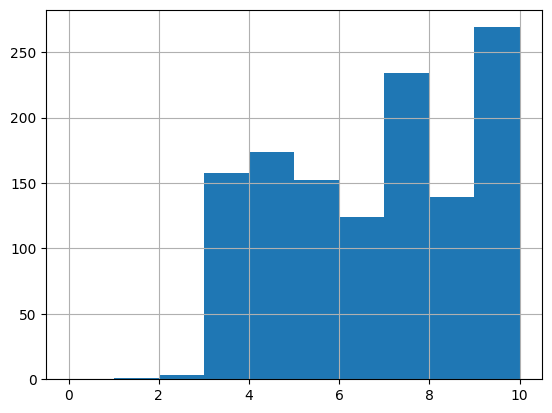

In [38]:
data['days_exposition'].hist(bins=10,range=(0,10))

В таблице нет строк с экспозицией меннее одного дня. Можно предположить, что объявления
снятые в день их подачи получили пропуск.Заполним нулями пропущенные значения. В результате  
в столбце будет удобный маркер для фильтрации или замены на другие значения обработанных пропусков.  
Данные таблицы будут сохранены в прежнем объеме.Тип данных в столбце можно привести к типу 'int'.


 



In [39]:
data['days_exposition'] = data['days_exposition'].fillna(0)

In [40]:
# проверка замены пропусков, ожидаемый результат 0
data['days_exposition'].isna().sum()

0

In [41]:
data['days_exposition']=data['days_exposition'].astype('int')

Убедимся, что тип данных столбца int64

In [42]:
data['days_exposition'].dtypes

dtype('int32')

#### Преобразование типа данных

При обработке пропущенных значений  типы  данных  в столбцах  были преобразованы следующим образом: 

 1. По возможности числовые данные были преведены к целочисленному типу.  
 2. Данные,содержащие False либо True приведены к булеву типу.
 3. Так же следует преобразовать даты в специальный тип datetime64.  
 
Следуя этим правилам преобразуем типы данных в остальных столбцах.
    
    

In [43]:
# преобразование в int из столбцов 'last_price','total_area'.
data['last_price'] = data['last_price'].astype('int')
data['total_area'] = data['total_area'].astype('int')

Преобразуем данные в `first_day_exposition` к типу datetime64[ns]

In [44]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format ='%Y-%m-%dT%H:%M:%S')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23650 non-null  int32         
 1   rooms                 23650 non-null  int64         
 2   total_area            23650 non-null  int32         
 3   living_area           21752 non-null  float64       
 4   kitchen_area          21381 non-null  float64       
 5   floor                 23650 non-null  int64         
 6   balcony               23650 non-null  int32         
 7   ceiling_height        23650 non-null  float64       
 8   floors_total          23650 non-null  int32         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  locality_name         23650 non-null  object        
 13  citycenters_near

#### Поиск дубликатов


Убедимся в отсутствии явных дубликатов, ожидаемое значение 0


In [46]:
data.duplicated().sum()

0

Поиск неявных дубликатов в столбце ` locality_name`

In [47]:
# настроим отображение датафрейма без ограничения показа строк.
pd.set_option('display.max_rows', None)

In [48]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [49]:
data['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

Для исключения дублирования одинаковых названий Заменим  букву 'ё' на 'e'

In [50]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

Населенные пункты:  
городской поселок,коттеджный поселок,поселок городского типа,село,деревня  заменим словом **поселок**.  

Садоводческое некоммерческое товарищество,садовое товарищество заменим словом **снт**.

    

In [51]:
#замена в столбце locality_name регулярной строки на подстроку  'поселок'
data['locality_name'] = data['locality_name'].str\
.replace(r'городской поселок|коттеджный поселок|поселок городского типа|село|деревня|поселок','поселок'
         , regex=True )
# замена в столбце locality_name регулярной строки на подстроку 'снт'
data['locality_name'] = data['locality_name'].str\
.replace('садоводческое некоммерческое товарищество|садовое товарищество','снт' , regex=True )


Давайте проверим, есть ли населенные пункты с одинаковыми названиями в наших данных. Для этого выполним следующие шаги:

1. Удалим слова "поселок" и "снт" перед названием каждого населенного пункта.
2. Выведем список уникальных названий, которые могут повторяться после удаления указанных слов.
3. Составим таблицу с названиями, включающими эти значения списка как подстроки. 
Таким образом, мы создадим столбец со списком неявных дубликатов.

In [52]:
data['locality_name']

0                                          Санкт-Петербург
1                                           поселок Шушары
2                                          Санкт-Петербург
3                                          Санкт-Петербург
4                                          Санкт-Петербург
5                                          поселок Янино-1
6                                        поселок Парголово
7                                          Санкт-Петербург
8                                           поселок Мурино
9                                          Санкт-Петербург
10                                         Санкт-Петербург
11                                               Ломоносов
12                                               Сертолово
13                                                Петергоф
14                                                  Пушкин
15                                         Санкт-Петербург
16                                         Санкт-Петербу

In [53]:
# создадим столбец с уникальными названиями из 'locality_name'.
new_loc =pd.Series(sorted(data['locality_name'].unique()))


# удалим слово 'поселок' или 'cнт' из названиям, заменив его пустой строкой.
new_loc_dup =new_loc .str.replace('поселок|снт','', regex=True )

# удалим возможный пробел перед  оставшимся названием
new_loc_dup =new_loc_dup.str.replace(' ','',1)

# список уникальных названий дубликатов
print (new_loc_dup[new_loc_dup.duplicated()].unique().tolist())

#регулярная строка  с или для списка уникальных названий дубликатов
reg_string = '|'.join(new_loc_dup[new_loc_dup.duplicated()].unique().tolist())

#фильтрация строк включающих подстроки( любое значение из списка дубликатов)
new_loc[new_loc.str.contains(reg_string,regex=True)] 
  
   

['Кудрово', 'Любань', 'Мурино', 'Никольское', 'Приладожский', 'Рахья']


17                  Кудрово
21                   Любань
22                   Мурино
23               Никольское
129         поселок Кудрово
149          поселок Любань
164          поселок Мурино
172      поселок Никольское
205    поселок Приладожский
218           поселок Рахья
311        снт Приладожский
312               снт Рахья
dtype: object

Для устранения неявных дубликатов, связанных с отсутствием категории населенного пункта в названиях, добавим слово 'поселок' к названиям 'Кудрово', 'Любань', 'Мурино' и 'Никольское'.
Также  переименуем единично встречающееся 'снт' в 'поселок' для всего датафрейма.
Эти меры помогут стандартизировать наименования и устранить  неявные дубликаты в данных.

In [54]:
# переберем  названия-дубликаты в цикле 
for t in new_loc_dup[new_loc_dup.duplicated()].unique().tolist():
# добавим слово 'поселок' к названию ('Кудрово', 'Любань', 'Мурино', 'Никольское') 
# ('Приладожский', 'Рахья') в логическую филбтрацию не попадет, так как перед названием будет слово
# снт или поселок.
    data.loc[ data['locality_name'] == t,'locality_name']='поселок '+t
    
# изменим 'снт' на 'поселок', этим мы  также устраним дубликаты с названиями 'Приладожский', 'Рахья'.
data['locality_name'] = data['locality_name'].str.replace( 'снт','поселок' )


Убедимся в отсутствии дубликатов, просмотрев список уникальных значений.

In [55]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'поселок Агалатово',
 'поселок Александровская',
 'поселок Алексеевка',
 'поселок Аннино',
 'поселок Аро',
 'поселок Барышево',
 'поселок Батово',
 'поселок Бегуницы',
 'поселок Белогорка',
 'поселок Белоостров',
 'поселок Большая Вруда',
 'поселок Большая Ижора',
 'поселок Большая Пустомержа',
 'поселок Большие Колпаны',
 'поселок Большое Рейзино',
 'поселок Большой Сабск',
 'поселок Бор',
 'поселок Борисова Грива',
 'поселок Бугры',
 'поселок Будогощь',
 '

В результате предобработки данных проведены следующие изменения:
1. Заполнены  пропуски  и приведены к целочисленныму типу данные в столбцах `balcony`,
`celing hieght`,`floor_total`,`parks_nearest`,`ponds_nearest`,`days_exposition`.
2. Устранены пропуски и приведены  к булеву типу данные в столбце ``is_apartment`.
3. В столбце`locality_name` пропущенные значения заполнены строкой 'unknown'.
4. Частично заполнены пропуски в столбце `airports_nearest` усредненными значениями рассстояний
   до соответствующих населенных пунктов. Там,где средние расстояния вычислить не удалось, оставлены пропуски.
5. Пропуски в данных в столбцах `kitchen_area`, `living_area`,`city_center_nearest` оставлены без изменений.
6. Проанализированы, и при необходимости, преобразованы типы данных в остальных столбцах.
7. Выявлены и устранены неявные дубликаты в столбце `locality_name`.

Пропуски,внесенные пользователем, в большинстве случаев случайны, однако нельзя
исключить случаи умышленного сокрытия параметров, влияющих на стоимость квартиры.
Пропуски в данных, переданные геослужбами неслучайны и имеют системный характер. Они могут быть обусловлены как отсутствием входных
данных( например пропущены сведения о местонахождении квартиры),так и особенностями алгоритмов обработки для получения значений расстояний до объектов.


### Добавьте в таблицу новые столбцы

In [56]:
data.columns

Index(['last_price', 'rooms', 'total_area', 'living_area', 'kitchen_area',
       'floor', 'balcony', 'ceiling_height', 'floors_total', 'is_apartment',
       'studio', 'open_plan', 'locality_name', 'citycenters_nearest',
       'airports_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'first_day_exposition',
       'days_exposition', 'total_images'],
      dtype='object')

Добавим столбец  `square_meter_price`- цена за 1 квадратный метр.
Разделим стоимость на общую площадь.

In [57]:
data['square_meter_price'] = (data['last_price']/data['total_area']).round(2)

In [58]:
data.head()

last_price  rooms  total_area  living_area  kitchen_area  floor  balcony  \
0    13000000      3         108         51.0          25.0      8        0   
1     3350000      1          40         18.6          11.0      1        2   
2     5196000      2          56         34.3           8.3      4        0   
3    64900000      3         159          NaN           NaN      9        0   
4    10000000      2         100         32.0          41.0     13        0   

   ceiling_height  floors_total  is_apartment  studio  open_plan  \
0            2.70            16         False   False      False   
1            2.65            11         False   False      False   
2            2.65             5         False   False      False   
3            2.65            14         False   False      False   
4            3.03            14         False   False      False   

     locality_name  citycenters_nearest  airports_nearest  parks_around3000  \
0  Санкт-Петербург              16028.0           18863.0                 1   
1   поселок Шушары              18603.0           12817.0                 0   
2  Санкт-Петербург              13933.0           21741.0                 1   
3  Санкт-Петербург               6800.0           28098.0                 2   
4  Санкт-Петербург               8098.0           31856.0                 2   

   parks_nearest  ponds_around3000  ponds_nearest first_day_exposition  \
0          482.0                 2          755.0           2019-03-07   
1            NaN                 0            NaN           2018-12-04   
2           90.0                 2          574.0           2015-08-20   
3           84.0                 3          234.0           2015-07-24   
4          112.0                 1           48.0           2018-06-19   

   days_exposition  total_images  square_meter_price  
0                0            20           120370.37  
1               81             7            83750.00  
2              558            10            92785.71  
3              424             0           408176.10  
4              121             2           100000.00

Создадим столбецы: `weekday_numeric` -день недели публикации,`month_numeric`-месяц публикации,  
                  `year_numeric` - год публикации.
                 

In [59]:
data['weekday_numeric'] = data['first_day_exposition'].dt.weekday
data['month_numeric'] = data['first_day_exposition'].dt.month
data['year_numeric'] = data['first_day_exposition'].dt.year

Сделаем столбец с категориями по этажам: **'первый', 'последний', 'другой'**.
После выведем значения столбцов и убедимся в правильности кода.

In [60]:
# применим lambda построчно к датафрейму
data['floor_category'] = data.apply(lambda x: 'последний' if x['floor'] == x['floors_total'] 
                else ('первый' if x['floor'] == 1 else 'другой'), axis=1)

In [61]:
data[['floors_total','floor','floor_category']].sample(10)

floors_total  floor floor_category
21270             5      5      последний
14527             5      1         первый
17823             5      1         первый
19118             9      6         другой
22057             6      2         другой
1709              5      1         первый
14784            19      9         другой
9174             10      9         другой
4008              5      4         другой
11822            23     12         другой

Добавим столбец (указание к пректу ) с расстоянием до центра города в км., округлим до целого.

In [62]:
data['citycenters_nearest_km'] = (data['citycenters_nearest']/1000). round()

In [63]:
data.head()

last_price  rooms  total_area  living_area  kitchen_area  floor  balcony  \
0    13000000      3         108         51.0          25.0      8        0   
1     3350000      1          40         18.6          11.0      1        2   
2     5196000      2          56         34.3           8.3      4        0   
3    64900000      3         159          NaN           NaN      9        0   
4    10000000      2         100         32.0          41.0     13        0   

   ceiling_height  floors_total  is_apartment  studio  open_plan  \
0            2.70            16         False   False      False   
1            2.65            11         False   False      False   
2            2.65             5         False   False      False   
3            2.65            14         False   False      False   
4            3.03            14         False   False      False   

     locality_name  citycenters_nearest  airports_nearest  parks_around3000  \
0  Санкт-Петербург              16028.0           18863.0                 1   
1   поселок Шушары              18603.0           12817.0                 0   
2  Санкт-Петербург              13933.0           21741.0                 1   
3  Санкт-Петербург               6800.0           28098.0                 2   
4  Санкт-Петербург               8098.0           31856.0                 2   

   parks_nearest  ponds_around3000  ponds_nearest first_day_exposition  \
0          482.0                 2          755.0           2019-03-07   
1            NaN                 0            NaN           2018-12-04   
2           90.0                 2          574.0           2015-08-20   
3           84.0                 3          234.0           2015-07-24   
4          112.0                 1           48.0           2018-06-19   

   days_exposition  total_images  square_meter_price  weekday_numeric  \
0                0            20           120370.37                3   
1               81             7            83750.00                1   
2              558            10            92785.71                3   
3              424             0           408176.10                4   
4              121             2           100000.00                1   

   month_numeric  year_numeric floor_category  citycenters_nearest_km  
0              3          2019         другой                    16.0  
1             12          2018         первый                    19.0  
2              8          2015         другой                    14.0  
3              7          2015         другой                     7.0  
4              6          2018         другой                     8.0

В таблицу добавлены столбцы:
1. `square_meter_price`- цена за кв.м.
2. `weekday_numeric`, `month_numeric`, `year_numeric`-  соответственно день, месяц, год  размещения объявления.
3. 'citycenters_nearest_km' растояние до центра в км.
4. 'floor_category' тип этажа ('первый', 'другой', 'последний').
                 

### Проведите исследовательский анализ данных

#### Изучение парметров таблицы

Список параметров для изучения:  
**цена объекта, общая площадь, жилая площадь, площадь кухни, количество комнат, высота потолков, тип этажа квартиры, общее количество этажей, расстояние до центра в метрах, расстояние до  
ближайшего аэропорта**.

In [64]:
  target_columns=['last_price', 'rooms', 'total_area', 'living_area', 'kitchen_area','ceiling_height',
           'floors_total', 'floor_category','citycenters_nearest','parks_nearest']


In [65]:
data[target_columns].head()


last_price  rooms  total_area  living_area  kitchen_area  ceiling_height  \
0    13000000      3         108         51.0          25.0            2.70   
1     3350000      1          40         18.6          11.0            2.65   
2     5196000      2          56         34.3           8.3            2.65   
3    64900000      3         159          NaN           NaN            2.65   
4    10000000      2         100         32.0          41.0            3.03   

   floors_total floor_category  citycenters_nearest  parks_nearest  
0            16         другой              16028.0          482.0  
1            11         первый              18603.0            NaN  
2             5         другой              13933.0           90.0  
3            14         другой               6800.0           84.0  
4            14         другой               8098.0          112.0

In [66]:
data[target_columns].describe().round(2)

last_price     rooms  total_area  living_area  kitchen_area  \
count  2.365000e+04  23650.00    23650.00     21752.00      21381.00   
mean   6.541127e+06      2.07       60.10        34.45         10.57   
std    1.089640e+07      1.08       35.67        22.04          5.90   
min    1.219000e+04      0.00       12.00         2.00          1.30   
25%    3.400000e+06      1.00       40.00        18.60          7.00   
50%    4.650000e+06      2.00       52.00        30.00          9.10   
75%    6.799000e+06      3.00       69.00        42.30         12.00   
max    7.630000e+08     19.00      900.00       409.70        112.00   

       ceiling_height  floors_total  citycenters_nearest  parks_nearest  
count        23650.00      23650.00             18139.00        8064.00  
mean             2.72         10.67             14197.86         490.83  
std              0.99          6.59              8606.83         342.55  
min              1.00          1.00               181.00           1.00  
25%              2.60          5.00              9241.00         288.00  
50%              2.65          9.00             13105.00         454.50  
75%              2.70         16.00             16293.00         612.00  
max            100.00         60.00             65968.00        3190.00

##### Изучение  столбца `last_price`

Рассмотрим столбец `last_price`. Разброс цен в данных превышает 30 000 раз, что явно указывает на наличие аномальных значений. Для наглядного отображения распределения цен построим гистограмму и boxplot. 

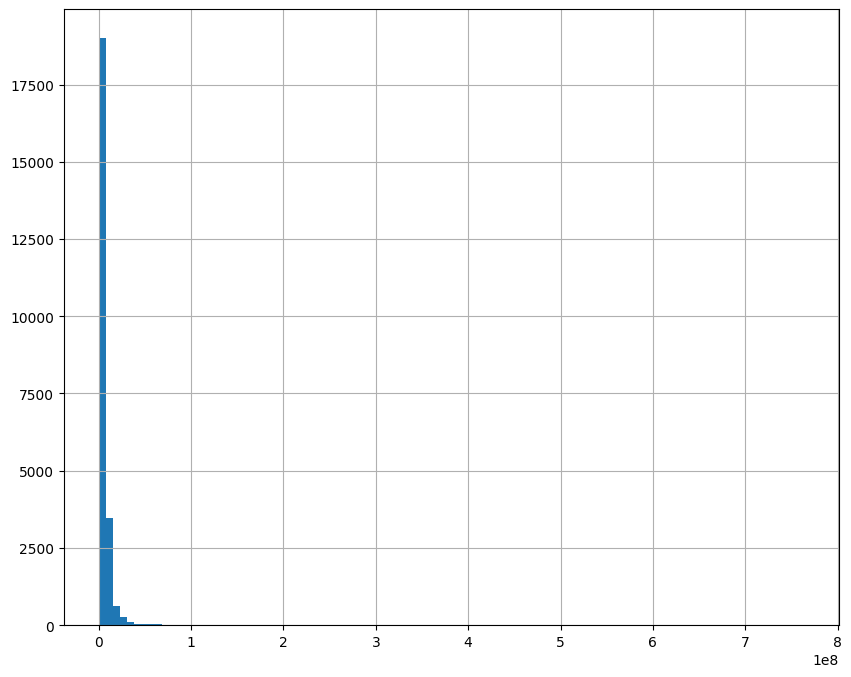

In [67]:
data['last_price'].hist(bins=100,figsize=(10,8))
plt.show()

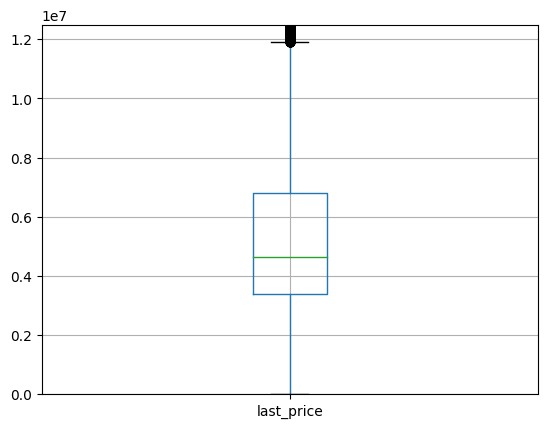

In [68]:
plt.ylim(0,0.125e+8)
data[['last_price']].boxplot(figsize=(25,25))
plt.show()

Построим диаграмму,ограничив интервал на диаграмме значением 40 0000 0000

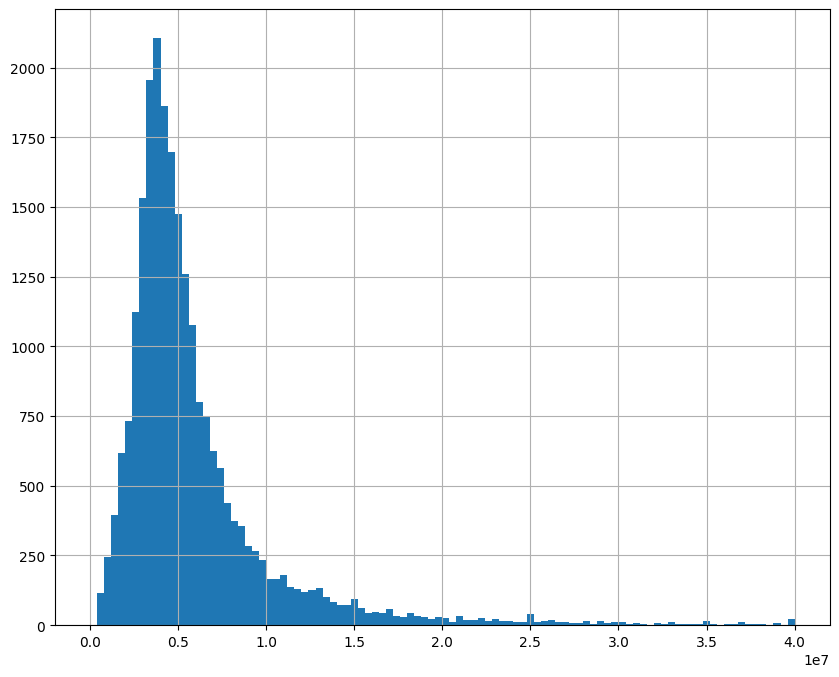

In [69]:
data['last_price'].hist(bins=100,figsize=(10,8),range=(0,4.0e+7))
plt.show()

При анализе  столбца last_price обнаружено, что разница между максимальной и минимальной ценой составляет более 30 000 раз. Это указывает на наличие выбросов в данных, подтвержденное также высоким значением стандартного отклонения (std).
На диаграмме размаха видно, что выбросы начинаются от отметки 12 000 000 рублей.
Гистограмма распределения цен показывает, что основная часть значений сосредоточена в диапазоне от 0 до 20 000 000 рублей, что соответствует основному диапазону стоимости квартир
Отфильтруем датафраейм,исключив значения, превышающие 20 000 000 рублей и сохраним изменения в **data_new**. Оценим произведенные изменения.

In [70]:
data_new=data.query('last_price < 2e+7 ')

In [71]:
data_new[target_columns].describe()

last_price         rooms    total_area   living_area  kitchen_area  \
count  2.292800e+04  22928.000000  22928.000000  21125.000000  20741.000000   
mean   5.411421e+06      2.008767     56.423674     32.521190     10.111176   
std    3.196707e+06      0.985064     24.601863     16.676232      4.717833   
min    1.219000e+04      0.000000     12.000000      2.000000      1.300000   
25%    3.400000e+06      1.000000     40.000000     18.500000      7.000000   
50%    4.550000e+06      2.000000     51.000000     30.000000      9.000000   
75%    6.500000e+06      3.000000     67.000000     41.300000     11.500000   
max    1.999900e+07     11.000000    320.000000    199.000000    100.700000   

       ceiling_height  floors_total  citycenters_nearest  parks_nearest  
count    22928.000000  22928.000000         17433.000000    7546.000000  
mean         2.714620     10.739271         14508.982619     494.045985  
std          1.000148      6.629275          8575.101620     342.233841  
min          1.000000      1.000000           208.000000       1.000000  
25%          2.600000      5.000000          9841.000000     289.250000  
50%          2.650000      9.000000         13279.000000     456.000000  
75%          2.700000     16.000000         16464.000000     614.000000  
max        100.000000     60.000000         65968.000000    3190.000000

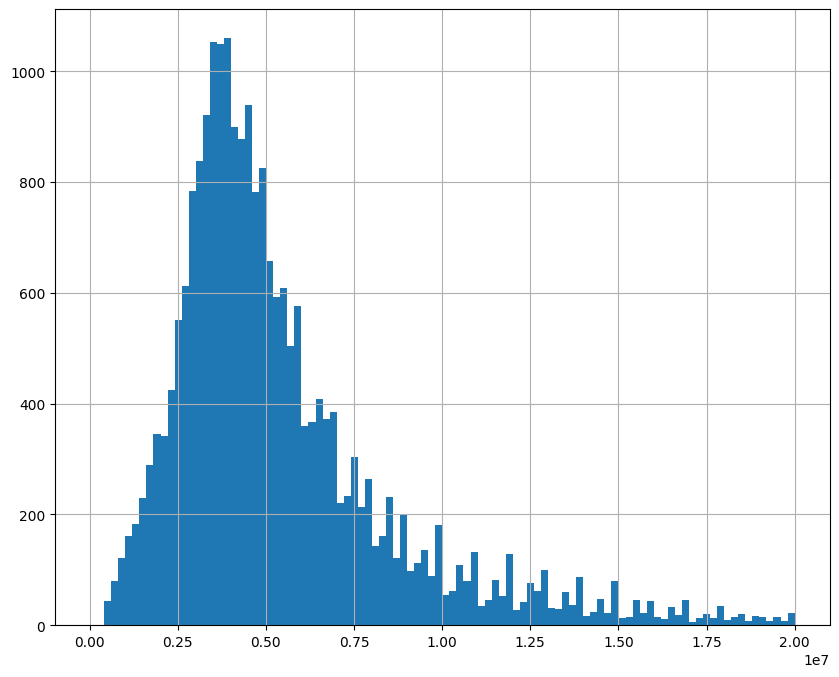

In [72]:
data_new['last_price'].hist(bins=100,figsize=(10,8))
plt.show()

Проверим распределение  цены на интервале (0,1000 000).

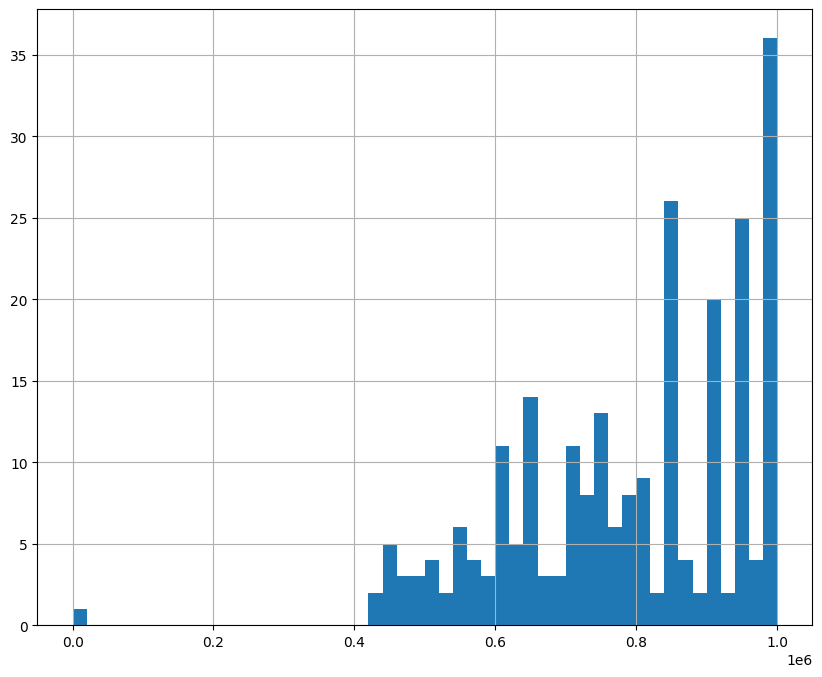

In [73]:
data_new['last_price'].hist(bins=50,figsize=(10,8),range=(0,1e+6))
plt.show()

Ткаже исключим данные с аномально низкой  стоимостью жилья меньшей или равной 500000 рублей.

In [74]:
data_new=data_new[data_new['last_price'] > 500000]


In [75]:
data_new.shape

(22910, 28)

##### Изучение столбцов `floor_category` и `floors_total`  соответствующих параметрам:  тип этажа квартиры и общее количество этажей,

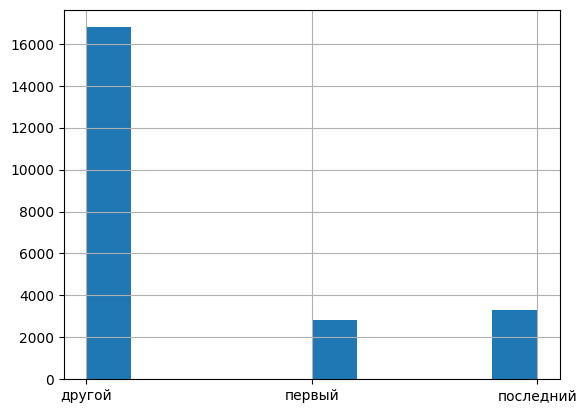

In [76]:
data_new['floor_category'].hist()
plt.show()

Распределение этажей выглядит правдоподобным, и при этом ожидаемо, что количество квартир в категории
'другой' будет существенно больше, чем количество первых и последних этажей. В то время  различие в количестве первых и последних этажей незначительно. что также подтверждает достоверность данных.

Перейдем к изучению  столбца `floors_total`.

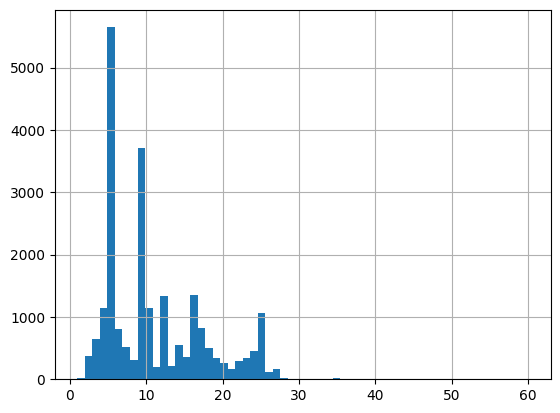

In [77]:
data_new['floors_total'].hist(bins=60)
plt.show()

In [78]:
data_new[data_new['floors_total']>35]

last_price  rooms  total_area  living_area  kitchen_area  floor  \
397       5990000      2          54         21.4         18.70     28   
2253      3800000      2          45         27.4          7.40      4   
5807      8150000      2          80         41.0         12.00     13   
11079     9200000      2          75         40.0         12.00     29   
16731     3978000      1          40         10.5         14.00     18   
16934     4100000      1          40         17.4          8.34      5   

       balcony  ceiling_height  floors_total  is_apartment  studio  open_plan  \
397          1            2.65            36         False   False      False   
2253         0            2.88            60         False   False      False   
5807         5           27.00            36         False   False      False   
11079        2            2.70            36         False   False      False   
16731        0            2.65            52         False   False      False   
16934        0            1.75            37         False   False      False   

         locality_name  citycenters_nearest  airports_nearest  \
397    Санкт-Петербург              20444.0           18732.0   
2253         Кронштадт              49488.0           67763.0   
5807   Санкт-Петербург              20444.0           18732.0   
11079  Санкт-Петербург              20444.0           18732.0   
16731  Санкт-Петербург              12978.0           20728.0   
16934  Санкт-Петербург              20444.0           18732.0   

       parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
397                   0            NaN                 3           80.0   
2253                  2          342.0                 3          614.0   
5807                  0            NaN                 3           80.0   
11079                 0            NaN                 3           80.0   
16731                 1          793.0                 0            NaN   
16934                 0            NaN                 3           80.0   

      first_day_exposition  days_exposition  total_images  square_meter_price  \
397             2018-03-22               11            15           110925.93   
2253            2018-06-28              166            12            84444.44   
5807            2019-01-09               38            17           101875.00   
11079           2019-02-22                0            16           122666.67   
16731           2018-09-24               45             9            99450.00   
16934           2017-10-17               71             5           102500.00   

       weekday_numeric  month_numeric  year_numeric floor_category  \
397                  3              3          2018         другой   
2253                 3              6          2018         другой   
5807                 2              1          2019         другой   
11079                4              2          2019         другой   
16731                0              9          2018         другой   
16934                1             10          2017         другой   

       citycenters_nearest_km  
397                      20.0  
2253                     49.0  
5807                     20.0  
11079                    20.0  
16731                    13.0  
16934                    20.0

В таблице обнаружены  квартиры в домах, с высотой более50 этажей.ТЭти значения представляются аномально высокими. Таких записей всего две.Для корректности данных удалим их.

In [79]:
data_new=data_new[data_new['floors_total'] < 50]

##### Изучение столбцов `citycenters_nearest` и `parks_nearest	`  соответствующих параметрам:  расстояние до центра в метрах, расстояние до ближайшего парка.

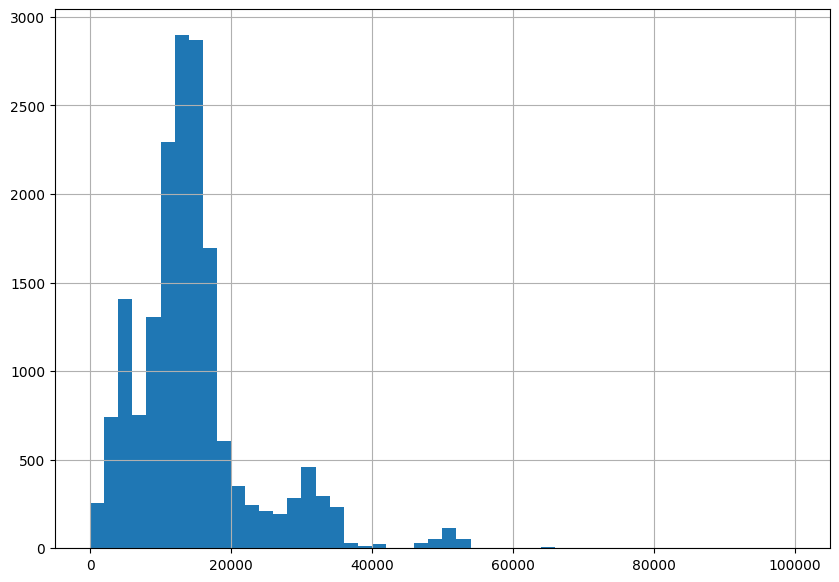

In [80]:
 data_new['citycenters_nearest'].hist(bins=50, figsize=(10,7),range=(0,100000))
 plt.show()   

<AxesSubplot:>

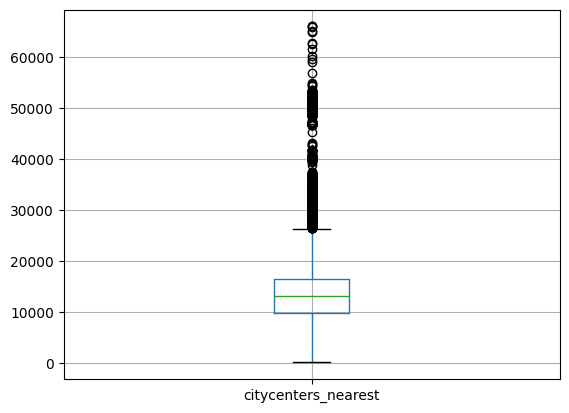

In [81]:
data_new[['citycenters_nearest']].boxplot()

Посчитаем количество уникальных названий населенных пунктов, удаленных от центра  более чем на 30 км.

In [82]:
data_new[data_new['citycenters_nearest']>30000]['locality_name'].value_counts()

Колпино               315
Петергоф              195
Сестрорецк            182
Пушкин                143
Ломоносов             132
поселок Шушары        100
Кронштадт              94
Красное Село           67
Павловск               38
Зеленогорск            23
поселок Понтонный      20
поселок Саперный        6
поселок Молодежное      5
поселок Репино          3
поселок Щеглово         1
поселок Белоостров      1
Name: locality_name, dtype: int64

Вероятно геосервис измерял расстояние в этих населенных пунктах до центра Санкт-Петербурга.
Удаление строк со значениями боллее 35 км может быть обосновано только в рамках исследования, связанного
именно с этими данным, так как в противном случае мы рискуем потерять статистически значимые данные.
**На текущем этапе оставим этот столбец без изменений**. 









Построим гистограммe для столбца `parks_nearest` 

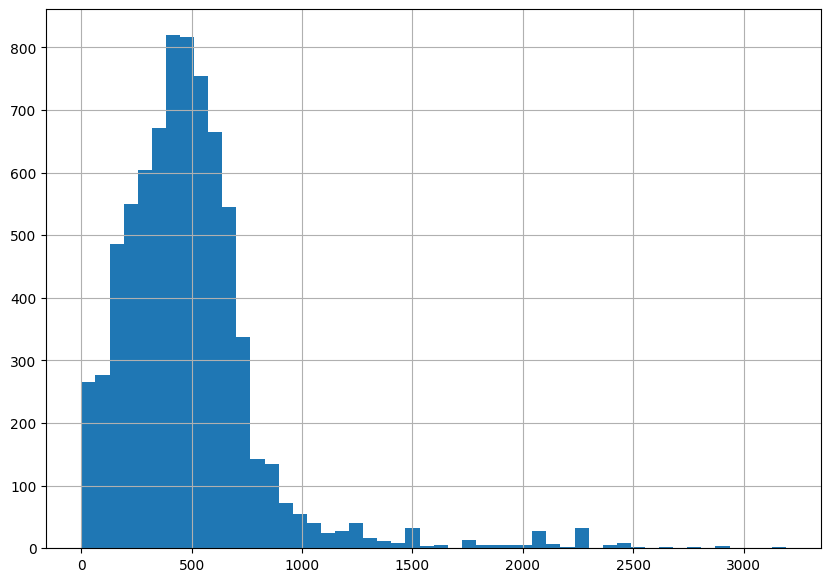

In [83]:
data_new['parks_nearest'].hist(bins=50, figsize=(10,7))
plt.show()

Изучим распределение значений в диапазоне (0, 30) м.

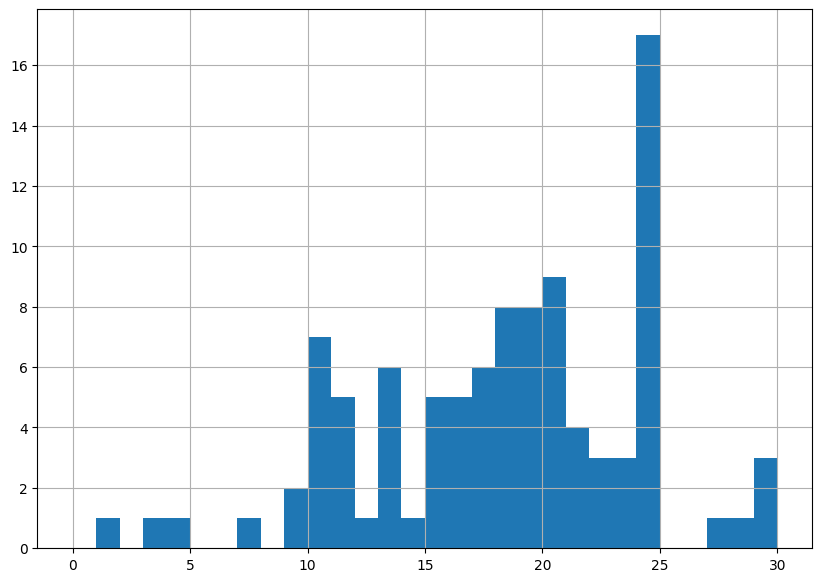

In [84]:
data_new['parks_nearest'].hist(bins=30, figsize=(10,7),range=(0,30))
plt.show()

Будем считать расстояния до парка менее 25 метров экстремально низкими значениями.
Вероятной причиной таких наблюдений может быть погрешность в определении расстояний с использованием
геосервисов. Для коррекции данных минимальное значение расстояния установим равным 25 метрам.

In [85]:
data_new['parks_nearest'].where(data_new['parks_nearest']>25, 25,inplace=True)

In [86]:
data_new[target_columns].describe().round(2)


last_price     rooms  total_area  living_area  kitchen_area  \
count     22908.00  22908.00    22908.00     21111.00      20728.00   
mean    5415457.41      2.01       56.44        32.53         10.11   
std     3195033.31      0.99       24.60        16.68          4.71   
min      520000.00      0.00       12.00         2.00          1.30   
25%     3400000.00      1.00       40.00        18.50          7.00   
50%     4550000.00      2.00       51.00        30.00          9.00   
75%     6500000.00      3.00       67.00        41.30         11.50   
max    19999000.00     11.00      320.00       199.00        100.70   

       ceiling_height  floors_total  citycenters_nearest  parks_nearest  
count        22908.00      22908.00             17430.00       22908.00  
mean             2.71         10.74             14507.37         179.46  
std              1.00          6.61              8571.64         295.19  
min              1.00          1.00               208.00          25.00  
25%              2.60          5.00              9842.25          25.00  
50%              2.65          9.00             13280.00          25.00  
75%              2.70         16.00             16464.00         284.00  
max            100.00         37.00             65968.00        3190.00

Изучим столбец 'total_area'.

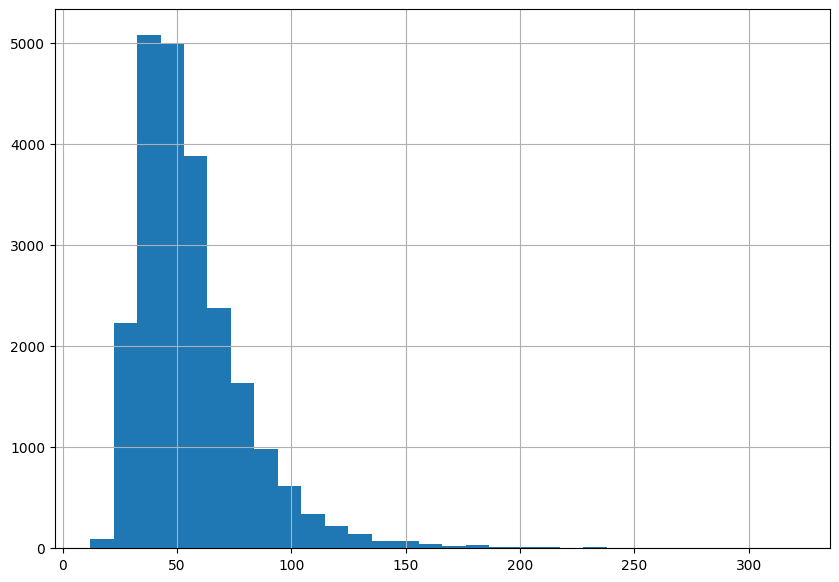

In [87]:
data_new['total_area'].hist(bins=30,figsize =(10,7))
plt.show()

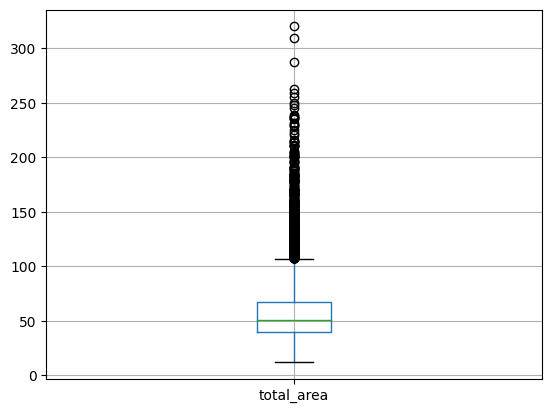

In [88]:
data_new[['total_area']].boxplot()
plt.show()

Общая площадь квартир  распределена в интервале от 25 до 100 м.кв., межквартильный размах 55км.кв.,
50% квартир находится в интервале (40,67) м.кв. 
Построим гистограмму с диапазонам (0,25) и сделаем срез квартир площадью менее 20кв.м.

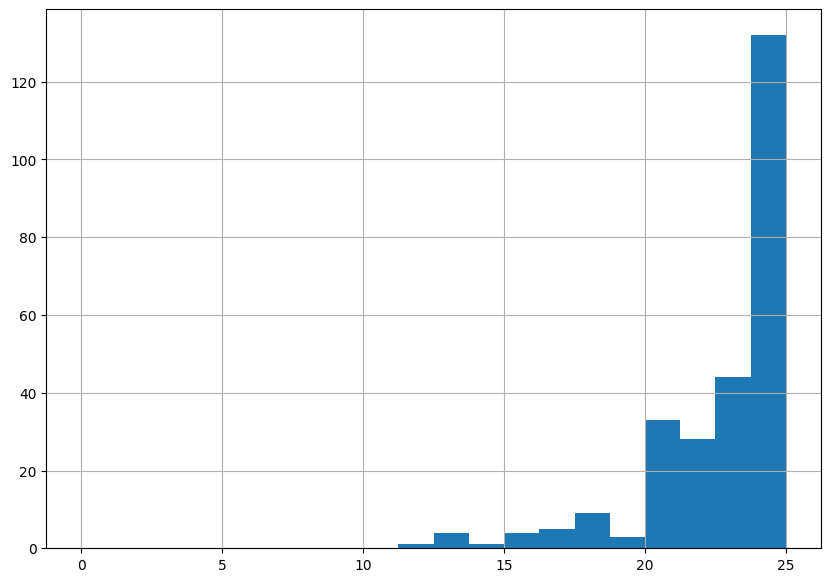

In [89]:
data_new['total_area'].hist(bins=20,figsize =(10,7),range=(0,25)) 
plt.show()
                            

In [90]:
data_new[data_new['total_area']<=20].sort_values('total_area')

last_price  rooms  total_area  living_area  kitchen_area  floor  \
19904     2400000      1          12        10.00           NaN      2   
19807     3800000      1          13        10.00           NaN      3   
19558     1686000      1          13          NaN           NaN      1   
19546     1850000      1          13          NaN           NaN      2   
17961     1400000      1          13          NaN           NaN      1   
19642     1190000      1          14        11.00          2.00      1   
12040     1900000      1          15          NaN           NaN      1   
16949     1550000      1          15          NaN           NaN      1   
8886      2450000      0          15        10.00           NaN      2   
9412      2100000      0          16        13.00           NaN      1   
21802     1737000      1          17        15.89           NaN      1   
22356     2050000      1          17          NaN           NaN      1   
10208     1900000      1          17        13.00          3.00      2   
9157      3400000      1          17        15.00           NaN      2   
716       1500000      0          17        12.00           NaN      1   
8755      1350000      0          18        15.80           NaN      1   
20714     1200000      1          18          NaN           NaN      4   
4542      3300000      1          18         9.00           NaN      2   
6084       770000      1          18        13.00          3.00      4   
19311     2190000      1          18        10.00           NaN      1   
12996     1900000      0          18        16.00           NaN      3   
12881     1500000      1          18          NaN           NaN      5   
23191     1900000      1          18        16.00           NaN     12   
8729      2200000      1          18        14.00          2.40      3   
9817      2190000      0          19        15.00           NaN      1   
5855       945750      0          19        12.70           NaN      2   
8454      2250000      0          19          NaN           NaN      2   
12737     2300000      0          20        15.50           NaN     13   
1608      2150000      1          20          NaN           NaN      1   
21419     1870000      1          20        14.00          2.00      1   
4077      3000000      2          20        13.00          5.60      2   
5312      1800000      0          20        16.00           NaN     10   
19477     2300000      0          20        16.00           NaN      1   
10273     1870000      0          20        15.80           NaN     13   
6544      2740000      1          20        16.00          4.00      1   
17860     2385000      1          20          NaN           NaN      2   
8873      2950000      1          20        14.00          6.00      1   
7577      2000000      1          20        10.55           NaN     17   
13496     1900000      1          20        14.85           NaN      2   
10964     1150000      1          20        16.00           NaN      1   
7755      1811250      1          20        14.95         14.95     13   
12358     1900000      1          20        15.79           NaN      1   
16991     1750000      1          20          NaN           NaN     18   

       balcony  ceiling_height  floors_total  is_apartment  studio  open_plan  \
19904        0            2.55             5         False   False      False   
19807        0            2.65             5         False   False      False   
19558        0            2.65             5         False   False      False   
19546        0            3.40             5         False   False      False   
17961        0            2.60             9         False   False      False   
19642        0            2.65             5         False   False      False   
12040        0            2.50             5         False   False      False   
16949        0            2.70             9         False   False      False   
8886         0       

Квартиры площадью менее или равные 20 кв.м. и более 150кв.м. исключим из наших данных. 
Их количество незначительно, указанные значения выходят за пределы диапазона усредненных параметров
площади квартир.  




In [91]:
data_new = data_new.query('total_area > 20 and total_area < = 150 ')

Изучим столбцы `living_area, kitchen_area`

In [92]:
data_new[target_columns].describe().round(2)

last_price     rooms  total_area  living_area  kitchen_area  \
count     22681.00  22681.00    22681.00     20912.00      20555.00   
mean    5340638.41      1.99       55.49        31.92         10.03   
std     3065078.13      0.94       21.71        14.92          4.54   
min      520000.00      0.00       21.00         2.00          1.30   
25%     3400000.00      1.00       40.00        18.40          7.00   
50%     4538000.00      2.00       50.00        30.00          9.00   
75%     6435720.00      3.00       66.00        41.00         11.50   
max    19999000.00      8.00      150.00       128.00         64.00   

       ceiling_height  floors_total  citycenters_nearest  parks_nearest  
count        22681.00      22681.00             17226.00       22681.00  
mean             2.71         10.77             14568.98         178.77  
std              1.00          6.62              8543.65         294.87  
min              1.00          1.00               208.00          25.00  
25%              2.60          5.00              9967.00          25.00  
50%              2.65          9.00             13322.00          25.00  
75%              2.70         16.00             16478.00         283.00  
max            100.00         37.00             65968.00        3190.00

Медианные значения.квартильный  и размах и максимальные значения для столбцов `living_area, kitchen_area	`находятся в разумных пределах.Минимальные значения требуют изучения.

Построим гистограммы для столбцов `living_area`и `kitchen_area`.

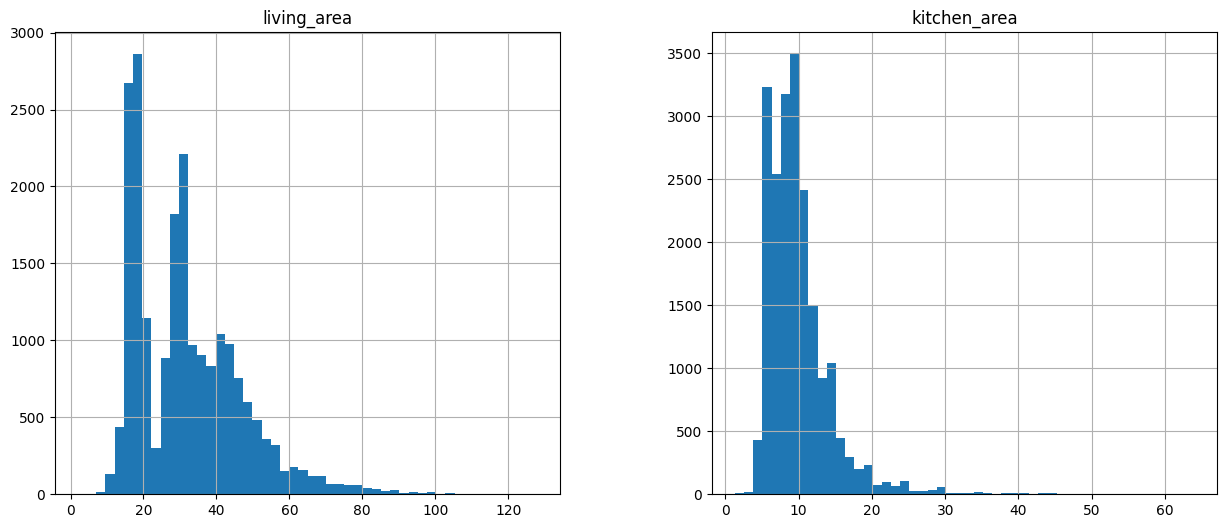

In [93]:
data_new[['living_area','kitchen_area']].hist(bins=50,figsize=(15,6))
plt.title('living_area')
plt.title('kitchen_area')
plt.show()

Изучим квартиры  с жилой площадью менее или равной 10 м.кв.

In [94]:
data_new[data_new['living_area'] <15 ].sort_values(by='living_area')


last_price  rooms  total_area  living_area  kitchen_area  floor  \
21758     2330000      0          23         2.00           NaN     22   
13915     6350000      2          52         2.00          9.00      2   
3242      4440000      1          41         3.00         11.00     17   
17582     2680000      0          22         5.00           NaN      8   
21943     6100000      4          77         5.40          9.80      1   
16431     3799000      1          31         6.00         17.00      1   
19251     4050000      1          33         6.50         18.00     21   
23208     4800000      1          37         8.00         22.00     11   
20994     8900000      2          50         8.00         31.00      3   
114       4000000      1          21         8.30          6.30      7   
2309      4200000      2          62         8.40         41.00      6   
21505     4100000      1          35         8.50         16.10     11   
17248     5300000      1          33         8.90         16.10     16   
7312      3400000      2          27         9.00         16.00      4   
4100      5300000      1          34         9.00         17.10     15   
22252     3340000      1          37         9.00         19.00      4   
8325      4800000      2          52         9.00          6.00      2   
19620     4300000      1          33         9.00         17.00      1   
680       7200000      1          43         9.00         23.00      2   
15833     4600000      1          33         9.00         14.30     12   
1326      8100000      2          52         9.00         32.00     15   
22473     3490304      2          33         9.10         16.40      9   
21908     5300000      1          46         9.80         26.00      3   
10439     5900000      1          43        10.00         22.00      8   
10520     2600000      1          32        10.00         15.00      7   
21909     4350000      1          33        10.00         16.00      2   
10319     3216089      1          35        10.00           NaN      8   
1947      1400000      1          24        10.00          6.00      5   
15555     3024353      1          35        10.00           NaN      2   
1816      1650000      1          22        10.00           NaN     15   
7700      3001767      1          35        10.00           NaN      4   
2699      3850000      1          37        10.00         15.00      7   
4797      3638724      1          34        10.00           NaN      2   
21393     2560000      1          43        10.00         20.00     15   
21368     2950000      1          33        10.00         11.00      2   
18278     3109347      1          36        10.00           NaN      5   
5531      1800000      1          26        10.00          8.00      1   
14103     3650000      1          34        10.00         15.00      7   
19468     2450000      1          43        10.00         22.30      9   
19253     4990000      1          38        10.00         10.00      2   
7460      8000000      1          40        10.00         20.00      6   
8086      3100000      1          38        10.00         20.00      3   
7829      3390000      1          23        10.00          7.00      1   
10291     3300000      1          28        10.00         10.00     13   
5019      4490000      1          32        10.00         12.00     20   
2654      3936700      1          42        10.00         15.90      4   
12387     4000000      1          33        10.00          7.00      1   
23359     3114406      1          36        10.00           NaN      5   
615       4100000      1          43        10.00         20.00     12   
248       4100000      1          31        10.00           NaN      6   
12104     3182400      1          35        10.00           NaN      7   
12177     5299000      1          37        10.00         15.00     10   
7268      3500000      1          36        10.08         16.30     10   
23481     3

Можно заметить, что в стречаются экстремально низкие значения,а в некоторых квартирах жилая площадь меньше площади кухни. Отфильтруем такие строки.

In [95]:
data_new[data_new['living_area'] <data_new['kitchen_area'] ].sort_values(by='living_area')

last_price  rooms  total_area  living_area  kitchen_area  floor  \
13915     6350000      2          52         2.00          9.00      2   
3242      4440000      1          41         3.00         11.00     17   
21943     6100000      4          77         5.40          9.80      1   
16431     3799000      1          31         6.00         17.00      1   
19251     4050000      1          33         6.50         18.00     21   
20994     8900000      2          50         8.00         31.00      3   
23208     4800000      1          37         8.00         22.00     11   
2309      4200000      2          62         8.40         41.00      6   
21505     4100000      1          35         8.50         16.10     11   
17248     5300000      1          33         8.90         16.10     16   
19620     4300000      1          33         9.00         17.00      1   
15833     4600000      1          33         9.00         14.30     12   
22252     3340000      1          37         9.00         19.00      4   
1326      8100000      2          52         9.00         32.00     15   
7312      3400000      2          27         9.00         16.00      4   
4100      5300000      1          34         9.00         17.10     15   
680       7200000      1          43         9.00         23.00      2   
22473     3490304      2          33         9.10         16.40      9   
21908     5300000      1          46         9.80         26.00      3   
21909     4350000      1          33        10.00         16.00      2   
7460      8000000      1          40        10.00         20.00      6   
21393     2560000      1          43        10.00         20.00     15   
5019      4490000      1          32        10.00         12.00     20   
19468     2450000      1          43        10.00         22.30      9   
14103     3650000      1          34        10.00         15.00      7   
615       4100000      1          43        10.00         20.00     12   
10520     2600000      1          32        10.00         15.00      7   
12177     5299000      1          37        10.00         15.00     10   
10439     5900000      1          43        10.00         22.00      8   
2654      3936700      1          42        10.00         15.90      4   
2699      3850000      1          37        10.00         15.00      7   
8086      3100000      1          38        10.00         20.00      3   
21368     2950000      1          33        10.00         11.00      2   
7268      3500000      1          36        10.08         16.30     10   
23481     3000000      1          37        10.08         16.88     10   
21854     7500000      1          33        10.30         15.10     18   
10475     4600000      1          39        10.30         14.40     18   
18373     3500000      1          35        10.40         14.30      2   
8315      4985000      1          51        10.40         20.70      5   
4457      3340000      1          37        10.40         16.60      9   
21399     5500000      1          42        10.50         22.00      1   
7942      5800000      1          36        10.50         15.50      3   
16034    12900000      2          60        10.50         30.00      3   
11215     3797250      1          33        10.52         14.97     14   
13437     5820000      1          39        10.60         16.40      8   
6         3700000      1          37        10.60         14.40      6   
11317     4050000      1          40        10.70         18.60      8   
9657      6360136      1          38        10.70         16.50     14   
17143     5500000      1          45        10.80         17.50     20   
7517      3450000      1          34        11.00         13.00     24   
707       4500000      1          40        11.00         14.20      4   
779       5100000      1          40        11.00         19.90      5   
17415     2600000      1          33        11.00         12.70      3   
17493     4

В некотрых случаях можно предположить,что перепутаны значения площади кухни и жилой площади,но встречаются 
значения  где жилая площадь чуть меньше площади кухни, возможно это особенности планировки.В некоторых
случаях возможны ошибки в порядке числа, например вместо 20 указано число 2. Алгоритм исправления 
таких ошибок достаточно сложен,такие строки проще исключить из общих данных.Применим следующие  условия:  
1. Жилая площадь менее 20м.кв. и жилая площадь меньше площади кухни.
2. Жилая площадь менее 10 кв.м 

    


In [96]:
data_new=data_new.query('~(living_area <20 and living_area < kitchen_area or living_area<10)')

In [97]:

data_new[target_columns].describe().round(2)

last_price     rooms  total_area  living_area  kitchen_area  \
count     22436.00  22436.00    22436.00     20667.00      20312.00   
mean    5341471.01      2.00       55.61        32.14          9.92   
std     3073501.90      0.94       21.78        14.87          4.42   
min      520000.00      0.00       21.00        10.00          1.30   
25%     3400000.00      1.00       40.00        18.60          7.00   
50%     4521000.00      2.00       51.00        30.00          9.00   
75%     6450000.00      3.00       67.00        41.00         11.30   
max    19999000.00      8.00      150.00       128.00         64.00   

       ceiling_height  floors_total  citycenters_nearest  parks_nearest  
count        22436.00      22436.00             17041.00       22436.00  
mean             2.71         10.72             14579.78         178.69  
std              1.01          6.60              8559.89         294.15  
min              1.00          1.00               208.00          25.00  
25%              2.60          5.00              9988.00          25.00  
50%              2.65          9.00             13317.00          25.00  
75%              2.70         16.00             16472.00         283.00  
max            100.00         37.00             65968.00        3190.00

Площадь кухни для квартир с минимальной плщадью более 20м.кв. будем считать аномальной величиной.

In [98]:
# срез таблицы для квартир с площадью кухни < 4
data_new[data_new['kitchen_area'] <4 ].sort_values(by='kitchen_area')

last_price  rooms  total_area  living_area  kitchen_area  floor  \
20217     4250000      1          28         19.5          1.30     10   
906       2600000      1          27         18.0          2.00     18   
6262      3100000      2          24         16.0          2.00      5   
9138      2920000      1          23         21.0          2.00      1   
16367     2720000      1          25         22.6          2.00     11   
11033     5350000      1          32         16.0          2.00     10   
17834     2940000      1          34         15.5          2.30     14   
7950      5967734      2          66         44.4          2.89      2   
2165      3180000      1          25         17.0          3.00     17   
18066     3600000      1          23         16.8          3.00     13   
17424     2700000      1          26         17.4          3.00      3   
15014     3350000      1          28         20.2          3.00      8   
13814     3650000      1          28         18.0          3.00     10   
3078      6000000      2          43         29.3          3.20      2   
14836     3900000      2          45         28.4          3.30      1   
12595     3700000      2          44         28.4          3.40      5   
23498     1600000      2          54         33.0          3.50      1   
12370     7575000      2          59         32.6          3.50     22   
10058     3350000      1          25         17.0          3.50     21   
14183     5200000      2          47         36.0          3.50      3   
8712     14948000      2          42         27.5          3.70      4   
7047      2800000      1          21         14.9          3.80      3   
3195      2690000      1          25         16.2          3.80      7   
11475     2500000      2          40         26.8          3.80      2   

       balcony  ceiling_height  floors_total  is_apartment  studio  open_plan  \
20217        0            2.80            14         False   False      False   
906          0            2.75            23         False   False      False   
6262         0            3.00             5         False   False      False   
9138         0            2.65             3         False   False      False   
16367        0            2.65            19         False   False      False   
11033        0            2.65            14         False   False      False   
17834        1            2.65            26         False   False      False   
7950         0            2.65             4         False   False      False   
2165         0            2.50            25         False   False      False   
18066        2            2.65            25         False   False      False   
17424        1            2.78            19         False   False      False   
15014        2            2.77            27         False   False      False   
13814        2            2.60            19         False   False      False   
3078         0            2.90             4         False   False      False   
14836        0            3.00             1         False   False      False   
12595        1            2.50             5         False   False      False   
23498        0            2.30             1         False   False      False   
12370        2            2.65            23         False   False      False   
10058        0            2.65            21         False   False      False   
14183        0            3.30             4         False   False      False   
8712         0            2.80             4         False   False      False   
7047         0            2.65             5         False   False      False   
3195         0            2.50             9         False   False      False   
11475        1            2.50             2         False   False      False   

           locality_name  citycenters_nearest  airports_nearest  \
20217    Санкт-Петербург              12721.0      37199.000000

Исключим квартиры с  площадью кухонь меньше 4кв.м.Скорее всего причина аномальных значений некорректный
ввод данных продавцом.

In [99]:
# сохраним срез в data_new
data_new=data_new.query('kitchen_area>=4')

In [100]:
data_new[target_columns].describe().round(2)


last_price     rooms  total_area  living_area  kitchen_area  \
count     20288.00  20288.00    20288.00     19883.00      20288.00   
mean    5395718.18      2.02       56.15        32.35          9.93   
std     3063941.22      0.93       21.69        14.84          4.42   
min      520000.00      1.00       21.00        10.00          4.00   
25%     3450000.00      1.00       40.00        18.80          7.00   
50%     4600000.00      2.00       51.00        30.00          9.00   
75%     6500000.00      3.00       67.00        41.50         11.30   
max    19999000.00      8.00      150.00       128.00         64.00   

       ceiling_height  floors_total  citycenters_nearest  parks_nearest  
count        20288.00      20288.00             15581.00       20288.00  
mean             2.71         10.62             14598.83         179.94  
std              1.01          6.52              8605.01         292.74  
min              1.00          1.00               208.00          25.00  
25%              2.60          5.00             10017.00          25.00  
50%              2.65          9.00             13303.00          25.00  
75%              2.70         15.00             16453.00         288.00  
max            100.00         37.00             65968.00        3190.00

Результаты внесенных изменений в данные наглядно отражены в таблице выше:
мин и мах площади изученных столбцов соответствуют  границе нормы, были удалены
строки, в которых жилая площадь оказалась ниже площади кухни для квартир с жилой площадью меньше 10м.кв.,были исключены записи с аномально низкой и статистически высокой общей площадью жилья.

##### Изучение столбцов `ceiling_height	` , `rooms	`  соответствующие параметрам:    общая площадь, жилая площадь, площадь кухни

Максимальная высота потолков составляет 100м, минимальная 1м. Обработаем эти экстремальные значения

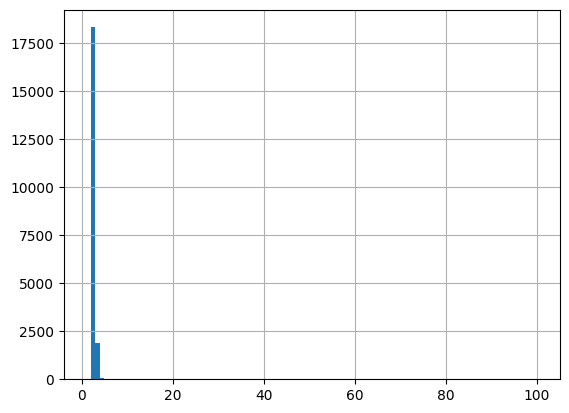

In [101]:
data_new['ceiling_height'].hist(bins=100)
plt.show()

In [102]:
data_new[data_new['ceiling_height'] >5 ].sort_values(by='ceiling_height')

last_price  rooms  total_area  living_area  kitchen_area  floor  \
3474      1400000      1          30         15.3           7.3      2   
15743     5600000      3          67         41.0           8.0      1   
5863      5650000      1          45         19.3           8.3     14   
15061     5600000      2          56         32.4           9.1      5   
17496     6700000      3          92         53.2          12.0     14   
20507     5950000      2          60         35.0          13.0     11   
5076      3850000      1          30         19.5           5.5      1   
11285     1950000      1          37         17.0           9.0      4   
4643      4300000      2          45         30.0           7.0      2   
6246      3300000      2          44         31.3           5.7      5   
9379      3950000      3          42         30.0           5.2      2   
14382     1700000      1          35         20.0           8.0      2   
5669      4400000      2          50         21.3           7.0      3   
21824     2450000      2          44         38.0           8.6      2   
20478     8000000      1          45         22.0          10.0      2   
22938     4000000      4          98         73.0           9.0      2   
10773     3800000      2          58         30.1           8.1      3   
5807      8150000      2          80         41.0          12.0     13   
5246      2500000      2          54         30.0           9.0      3   
21377     4900000      1          42         37.7          11.0     19   
22336     9999000      2          92         55.5          16.5      5   
3148      2900000      3          75         53.0           8.0      2   
22869    15000000      1          25         14.0          11.0      5   

       balcony  ceiling_height  floors_total  is_apartment  studio  open_plan  \
3474         0             8.0             5         False   False      False   
15743        0             8.0            16         False   False      False   
5863         1             8.3            16         False   False      False   
15061        2            14.0            14         False   False      False   
17496        5            20.0            17         False   False      False   
20507        1            22.6            14         False   False      False   
5076         0            24.0             5          True   False      False   
11285        2            25.0             5         False   False      False   
4643         1            25.0             9         False   False      False   
6246         0            25.0             5         False   False      False   
9379         0            25.0             5         False   False      False   
14382        1            25.0             5         False   False      False   
5669         2            26.0             9         False   False      False   
21824        2            27.0             2         False   False      False   
20478        1            27.0             4         False   False      False   
22938        1            27.0             2          True   False      False   
10773        2            27.0            10         False   False      False   
5807         5            27.0            36         False   False      False   
5246         2            27.0             5         False   False      False   
21377        2            27.5            24         False   False      False   
22336        4            32.0             6         False   False      False   
3148         0            32.0             3         False   False      False   
22869        5           100.0             5          True   False      False   

               locality_name  citycenters_nearest  airports_nearest  \
3474           поселок Нурма                  NaN               NaN   
15743        Санкт-Петербург              11035.0           32691.0   
5863         Санкт-Петербург              10763.0           13069.0   
1

Проведенный анализ данных позволяет предположить, что в случае квартир с высотой потолков больше 
20 метров возможна описка. Предполагается, что реальное значение высоты потолков в 10 раз меньше
указанного. Например, для высоты 27 метров верное значение составит 2.7 метра.Откорректируем данные,
заменив  их на верные значения.

В отношении других 
квартир с аномальными значениями высоты потолков закономерности в ошибке на данном этапе выявить не
удалось. Для улучшения данных предлагается заменить значения высоты потолков в таких квартирах на
медианное значение данного параметра.

In [103]:
# изменение значений в data_new['ceiling_height'] по условию если значение > 10  значение/10.
data_new['ceiling_height']= data_new['ceiling_height'].apply(lambda x: x/10 if x >=20  else x)


In [104]:
data_new[data_new['ceiling_height'] >5 ].sort_values(by='ceiling_height')

last_price  rooms  total_area  living_area  kitchen_area  floor  \
3474      1400000      1          30         15.3           7.3      2   
15743     5600000      3          67         41.0           8.0      1   
5863      5650000      1          45         19.3           8.3     14   
22869    15000000      1          25         14.0          11.0      5   
15061     5600000      2          56         32.4           9.1      5   

       balcony  ceiling_height  floors_total  is_apartment  studio  open_plan  \
3474         0             8.0             5         False   False      False   
15743        0             8.0            16         False   False      False   
5863         1             8.3            16         False   False      False   
22869        5            10.0             5          True   False      False   
15061        2            14.0            14         False   False      False   

         locality_name  citycenters_nearest  airports_nearest  \
3474     поселок Нурма                  NaN               NaN   
15743  Санкт-Петербург              11035.0           32691.0   
5863   Санкт-Петербург              10763.0           13069.0   
22869  Санкт-Петербург               8283.0           34963.0   
15061  Санкт-Петербург              13610.0           14814.0   

       parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
3474                  0           25.0                 0            NaN   
15743                 1          723.0                 0            NaN   
5863                  0           25.0                 1          613.0   
22869                 1          223.0                 3           30.0   
15061                 0           25.0                 0            NaN   

      first_day_exposition  days_exposition  total_images  square_meter_price  \
3474            2018-03-16              125             3            46666.67   
15743           2016-11-11              474            14            83582.09   
5863            2018-08-15               14            20           125555.56   
22869           2018-07-25               19             0           600000.00   
15061           2018-05-11              315            19           100000.00   

       weekday_numeric  month_numeric  year_numeric floor_category  \
3474                 4              3          2018         другой   
15743                4             11          2016         первый   
5863                 2              8          2018         другой   
22869                2              7          2018      последний   
15061                4              5          2018         другой   

       citycenters_nearest_km  
3474                      NaN  
15743                    11.0  
5863                     11.0  
22869                     8.0  
15061                    14.0

In [105]:

# в data_new['ceiling_height'] меняем значение по условию <= 5на медиану столбца.
#data_new['ceiling_height'].where(data_new['ceiling_height']<=5,
                                # data_new['ceiling_height'].median(),inplace=True) 

Изучим квартиры с высотой ппотолка менее 2м.

In [106]:

data_new[data_new['ceiling_height'] <=2].sort_values(by='ceiling_height' )

last_price  rooms  total_area  living_area  kitchen_area  floor  \
22590     6000000      2          55         32.4         10.00      7   
5712      1500000      2          42         27.5          5.20      1   
16934     4100000      1          40         17.4          8.34      5   
552       2999000      1          33         17.5          6.50      6   
2572      2400000      3          62         40.0          6.00      4   
4212      2120000      1          35         16.6          8.80      9   
11352     3300000      1          36         15.2         10.10     12   
16446    12300000      3          88         63.9         12.00      2   
16884     1500000      1          33         20.0          6.00      5   
17496     6700000      3          92         53.2         12.00     14   
19098     2700000      3          56         46.0          6.00      1   
20520     3600000      1          38         15.0         11.80      9   
22960     2300000      2          53         19.0         10.00      1   

       balcony  ceiling_height  floors_total  is_apartment  studio  open_plan  \
22590        0            1.00            12         False   False      False   
5712         0            1.20             2         False   False      False   
16934        0            1.75            37         False   False      False   
552          0            2.00            15         False   False      False   
2572         1            2.00             5         False   False      False   
4212         2            2.00            18         False   False      False   
11352        0            2.00            17         False   False      False   
16446        0            2.00             5         False   False      False   
16884        0            2.00             5         False   False      False   
17496        5            2.00            17         False   False      False   
19098        0            2.00             5         False   False      False   
20520        1            2.00            12         False   False      False   
22960        0            2.00             2         False   False      False   

              locality_name  citycenters_nearest  airports_nearest  \
22590       Санкт-Петербург              14217.0           33053.0   
5712            поселок Мга                  NaN               NaN   
16934       Санкт-Петербург              20444.0           18732.0   
552         Санкт-Петербург              11746.0           33972.0   
2572                   Луга                  NaN               NaN   
4212                  Тосно                  NaN               NaN   
11352  поселок Металлострой              26980.0           25268.0   
16446       Санкт-Петербург               7675.0           38415.0   
16884                Выборг                  NaN               NaN   
17496       Санкт-Петербург              15092.0           16295.0   
19098                Выборг                  NaN               NaN   
20520       поселок Кудрово                  NaN               NaN   
22960            Всеволожск                  NaN               NaN   

       parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
22590                 2          293.0                 2          289.0   
5712                  0           25.0                 0            NaN   
16934                 0           25.0                 3           80.0   
552                   1          520.0                 1          949.0   
2572                  0           25.0                 0            NaN   
4212                  0           25.0                 0            NaN   
11352                 0           25.0                 0            NaN   
16446                 1          568.0                 1          154.0   
16884                 0           25.0                 0            NaN   
17496                 1          967.0                 0            NaN   
19098                 0      

Количество строк с аномальными значениями высоты потолков ( 2м именее. или  5м. и более) 
оказалось незначительным. Исключим их из таблицы, сохраним только те строки,
в которых высота потолков выше 2 м. или ниже 5 м.
Проверим результат, применив метод .discribe()







In [107]:
data_new = data_new.query('ceiling_height > 2 and ceiling_height <5') 
data_new[['ceiling_height']].describe()

ceiling_height
count    20270.000000
mean         2.684392
std          0.198924
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.800000

In [108]:
data_new[target_columns].describe().round(2)

last_price     rooms  total_area  living_area  kitchen_area  \
count     20270.00  20270.00    20270.00     19865.00      20270.00   
mean    5396327.64      2.02       56.15        32.35          9.93   
std     3063368.99      0.93       21.69        14.84          4.42   
min      520000.00      1.00       21.00        10.00          4.00   
25%     3450000.00      1.00       40.00        18.80          7.00   
50%     4600000.00      2.00       51.00        30.00          9.00   
75%     6500000.00      3.00       67.00        41.50         11.30   
max    19999000.00      8.00      150.00       128.00         64.00   

       ceiling_height  floors_total  citycenters_nearest  parks_nearest  
count        20270.00      20270.00             15571.00       20270.00  
mean             2.68         10.62             14599.22         179.93  
std              0.20          6.52              8606.61         292.74  
min              2.20          1.00               208.00          25.00  
25%              2.60          5.00             10017.00          25.00  
50%              2.65          9.00             13303.00          25.00  
75%              2.70         15.00             16453.00         288.00  
max              4.80         36.00             65968.00        3190.00

Изучим столбец `rooms`- количество комнат в квартире.

<AxesSubplot:>

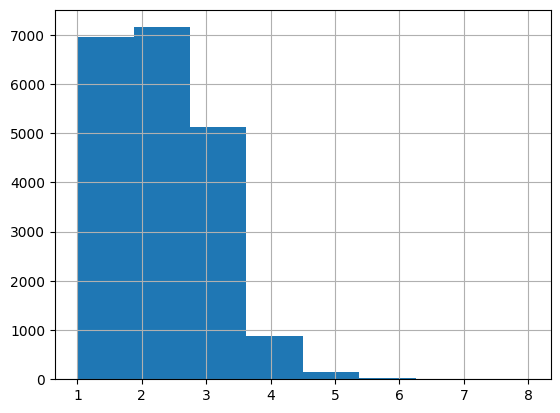

In [109]:
data_new['rooms'].hist(bins=8)

In [110]:
data_new[data_new['rooms'] >5 ].sort_values(by='rooms')

last_price  rooms  total_area  living_area  kitchen_area  floor  \
52       11795000      6         136         94.0          11.0      2   
21593    11000000      6         131        104.8           8.9      2   
21218     9000000      6         125         73.6          10.9     15   
20260     9500000      6         135         90.0          15.0      1   
19291    13300000      6         146        103.6          18.3      2   
18548    11700000      6         119         86.2           9.4      3   
14510     6864000      6          95         75.0          13.0      3   
14264    14000000      6          94         51.0          16.3     23   
12487    11970000      6         120         82.3           9.0      3   
22122     8500000      6         128         81.9           8.4      2   
10177    13030000      6         130         93.0          10.3      2   
11409     9990000      6         120         96.0          18.0      3   
5255      6100000      6          87         68.0           5.9      2   
3324      9200000      6         138         77.6          14.1      2   
3314     16550000      6          96         80.0          10.0      3   
2139     12590000      6         140        104.1          11.9      3   
2017      9100000      6         111         84.5          10.2      3   
201      10880000      6         123         89.0          11.0      2   
9856     12000000      6         106         70.0          15.0      1   
23047    10500000      6         110         75.0          11.0      6   
4159     17500000      7         146        108.0           9.0      3   
17991    12000000      7         125         82.0          24.0      5   
855      15000000      7         134         88.0          12.0      3   
21689    15000000      7         145        115.0          15.0      2   
8758     16100000      8         150        107.0           7.2      1   

       balcony  ceiling_height  floors_total  is_apartment  studio  open_plan  \
52           1            3.00             2         False   False      False   
21593        0            3.00             4         False   False      False   
21218        2            2.55            15         False   False      False   
20260        0            2.70            12         False   False      False   
19291        0            3.09             6         False   False      False   
18548        0            3.00            10         False   False      False   
14510        0            2.50            15         False   False      False   
14264        0            2.65            23         False   False      False   
12487        0            3.46             6         False   False      False   
22122        1            2.65             9         False   False      False   
10177        0            2.65             5         False   False      False   
11409        0            2.65            16         False   False      False   
5255         0            3.50             3         False   False      False   
3324         0            2.65             5         False   False      False   
3314         0            2.60             5         False   False      False   
2139         0            3.00             5         False   False      False   
2017         0            2.75             3         False   False      False   
201          0            3.20             5         False   False      False   
9856         0            2.80             3         False   False      False   
23047        0            3.20             7         False   False      False   
4159         0            3.30             4         False   False      False   
17991        0            3.30             6         False   False      False   
855          0            2.65             4         False   False      False   
21689        0            2.65             2         False   False      False   
8758         0            2.92             5         Fals

<AxesSubplot:>

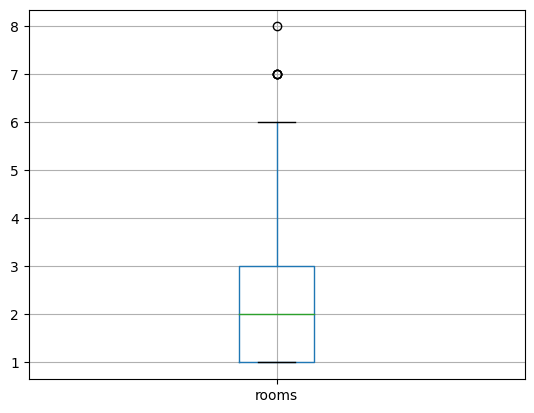

In [111]:
data_new[['rooms']].boxplot()

Несмотря на то, что в данных есть значения, выходящие за границы 'усов' диаграммы размаха, оставим их в таблице. На текущем этапе отсутствуют явные признаки ошибочности или аномальности этих данных, поэтому сохраним их для дальнейшего анализа..


#### Исследовние времени продажи квартиры.

В ходе предобработки данных пропуски в столбце `days_exposition` были заполнены нулевыми значениями. Это было сделано с предположением, что пропуски могли возникнуть из-за размещения объявления на срок менее одного дня. Однако для более точного анализа времени продажи квартиры предлагается создать срез, исключив эти нулевые значения. Такой подход позволит рассмотреть только объявления с реальными значениями времени продажи и улучшить аналитическую точность данных.

Создадим новый датафрейм days_new_сleaned, в который сохраним срез.


In [112]:
data_new_сleaned = data_new[data_new['days_exposition'] != 0]

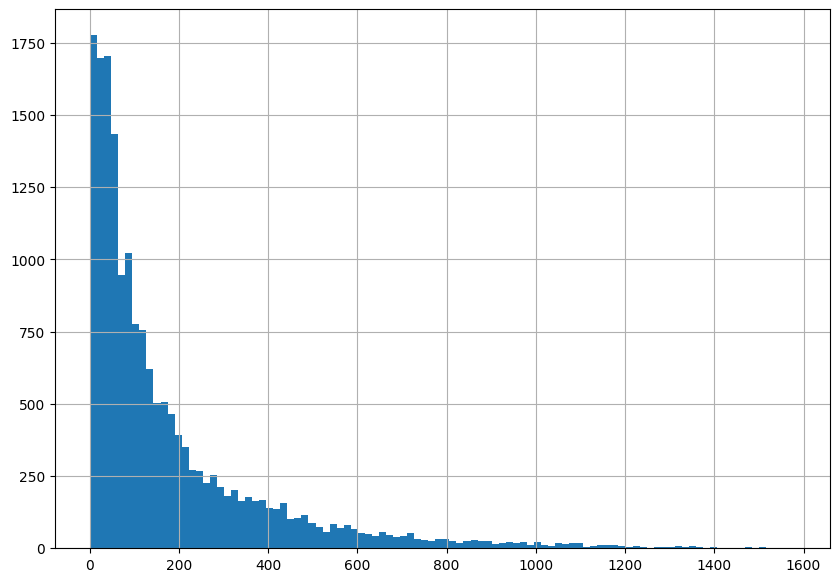

In [113]:
data_new_сleaned['days_exposition'].hist(bins=100,figsize=(10,7))
plt.show()

In [114]:
data_new_сleaned[['days_exposition']].describe().round(0)

days_exposition
count          17541.0
mean             182.0
std              219.0
min                1.0
25%               44.0
50%               99.0
75%              233.0
max             1580.0

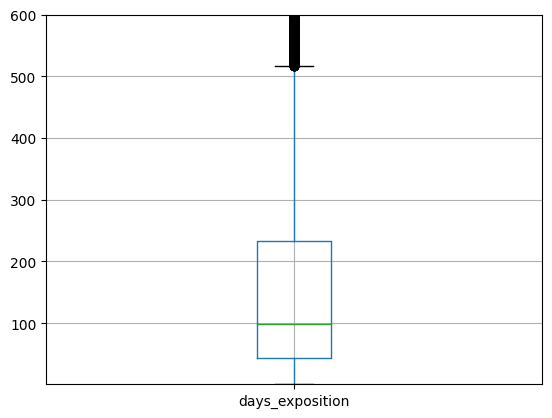

In [115]:
data_new_сleaned[['days_exposition']].boxplot()
plt.ylim(1,600)
plt.show()

Медианное время продажи составляет 99 денй.
Среднее же время продажи составило 182.Такая разница обусловленна необычно длинными сроками продаж,
максимальный  из которых составил 1580.
75% продаж завершились в течении 234 дней.Необычайно долгими можно считать продажи свыше 500 дней
(граница верхнего уса диаграммы размаха)
Быстрыми можно считать продажи ограниченные первым квартилем 45 дней.


Посмотрим как изменятся данные если из расчетов убрать необычайно медленные продажи, а также
быстрые (менее 3 дней)

In [116]:
data_new_сleaned[['days_exposition']].query('days_exposition <500 and days_exposition>=3').describe()

days_exposition
count     16040.000000
mean        128.537469
std         119.618353
min           3.000000
25%          39.000000
50%          88.000000
75%         184.000000
max         499.000000

Ожидаемо  значительно изменилось  среднее время продаж. Также уменьшились все остальные параметры,
хотя и не так значительно. Усредненные данные о времени продажи представлены в этой таблице более точно.
Подведем итоги:  

**Необычайно долгими** можно считать продажи свыше 500 дней.

**Средними продажами** следует считать величину квартильного размаха 145 дней.

**Быстрыми продажами** будем ситать продажи, завершенные в течении 39 дней.

**Медленными продажами** будем считать продажи длительностью от 184 до 500 дней.

Эти критерии помогают классифицировать продажи по их продолжительности, что может быть полезным для дальнейшего анализа или планирования.


####  Изучение зависимости цены на квартиру.

Параметры для поиска взаимосвязей:

**общая площадь, жилая площадь, площадь кухни, количество комнат,этажа,  даты размещения**.

 Сделаем срез таблицы с нужными данными и запишем ее в `data_new_price`

In [117]:
data_new_price = data_new[['last_price','total_area', 'living_area', 'kitchen_area','rooms',
                           'floor_category', 'weekday_numeric', 'month_numeric', 'year_numeric']]

In [118]:
data_new_price.describe()

last_price    total_area   living_area  kitchen_area         rooms  \
count  2.027000e+04  20270.000000  19865.000000  20270.000000  20270.000000   
mean   5.396328e+06     56.152343     32.351604      9.929863      2.023631   
std    3.063369e+06     21.686837     14.843418      4.416805      0.925827   
min    5.200000e+05     21.000000     10.000000      4.000000      1.000000   
25%    3.450000e+06     40.000000     18.800000      7.000000      1.000000   
50%    4.600000e+06     51.000000     30.000000      9.000000      2.000000   
75%    6.500000e+06     67.000000     41.500000     11.300000      3.000000   
max    1.999900e+07    150.000000    128.000000     64.000000      8.000000   

       weekday_numeric  month_numeric  year_numeric  
count     20270.000000   20270.000000  20270.000000  
mean          2.554218       6.423828   2017.370893  
std           1.785198       3.464557      1.037641  
min           0.000000       1.000000   2014.000000  
25%           1.000000       3.000000   2017.000000  
50%           3.000000       6.000000   2017.000000  
75%           4.000000      10.000000   2018.000000  
max           6.000000      12.000000   2019.000000

In [119]:
data_new_price.corr().round(2)

last_price  total_area  living_area  kitchen_area  rooms  \
last_price             1.00        0.77         0.64          0.58   0.48   
total_area             0.77        1.00         0.92          0.54   0.80   
living_area            0.64        0.92         1.00          0.28   0.89   
kitchen_area           0.58        0.54         0.28          1.00   0.15   
rooms                  0.48        0.80         0.89          0.15   1.00   
weekday_numeric       -0.02       -0.01        -0.01         -0.01  -0.00   
month_numeric          0.01        0.01         0.00          0.01   0.00   
year_numeric          -0.02       -0.08        -0.06         -0.05  -0.04   

                 weekday_numeric  month_numeric  year_numeric  
last_price                 -0.02           0.01         -0.02  
total_area                 -0.01           0.01         -0.08  
living_area                -0.01           0.00         -0.06  
kitchen_area               -0.01           0.01         -0.05  
rooms                      -0.00           0.00         -0.04  
weekday_numeric             1.00           0.01         -0.00  
month_numeric               0.01           1.00         -0.26  
year_numeric               -0.00          -0.26          1.00

Построим диаграммы расеяния для каждого из анализирумых параметров, каждым из которых назовем
соответствующую таблицу.

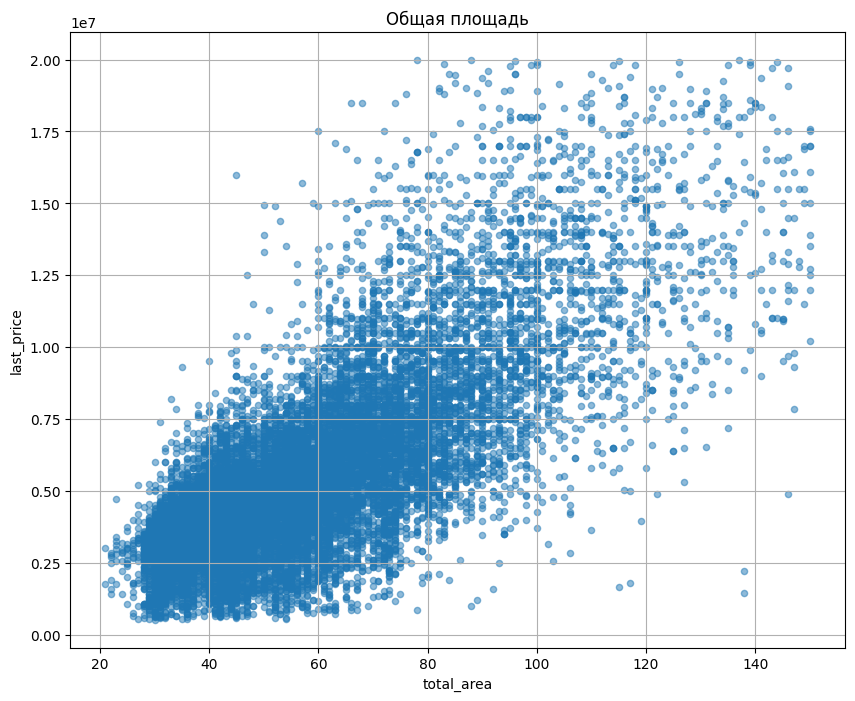

In [120]:
data_new_price.plot(x ='total_area', y = 'last_price',alpha=0.5, kind= 'scatter',title='Общая площадь',
                    grid=True,figsize=(10,8))
plt.show()

Связь между ценой квартиры и общей площадью очевидна. Коэффициент Пирсона для этой зависимости
равен 0.77, что говорит о сильной положительной корреляции. На диаграмме рассеяния   прослеживается  эта же тенденция. Большая ширина области рассеяния указывает на  влияние  других параметров.Таким образом, несмотря на явную связь с площадью, **широкий разброс может быть обусловлен воздействием других факторов на стоимость квартир**.

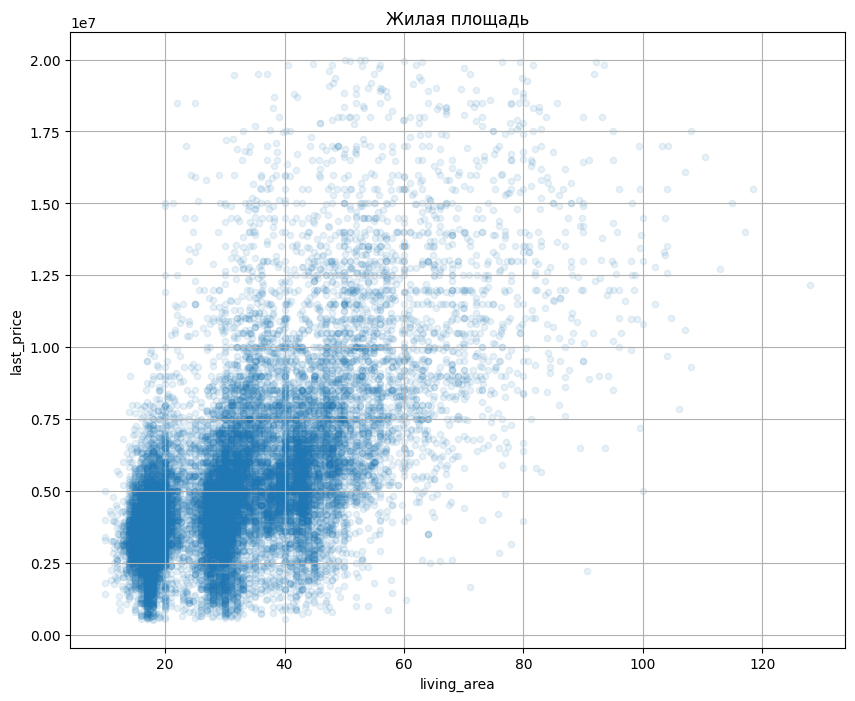

In [121]:
data_new_price.plot(x ='living_area', y = 'last_price',alpha=0.1, kind= 'scatter',title='Жилая площадь',
                    grid=True,figsize=(10,8))
plt.show()

Коэффициент Пирсона для данной зависимости равен 0.64, что говорит о умеренной положительной
корреляции. На диаграмме расеяния можно заметить три затемненых области в которых  вероятно 
распределено основное количество значений жилой площади.Форма этих пятен говорит **осущественном
влиянии на стоимость других параметров**.(Близким значениям жилой площади соответствует широкий
спектр значений стоимости).


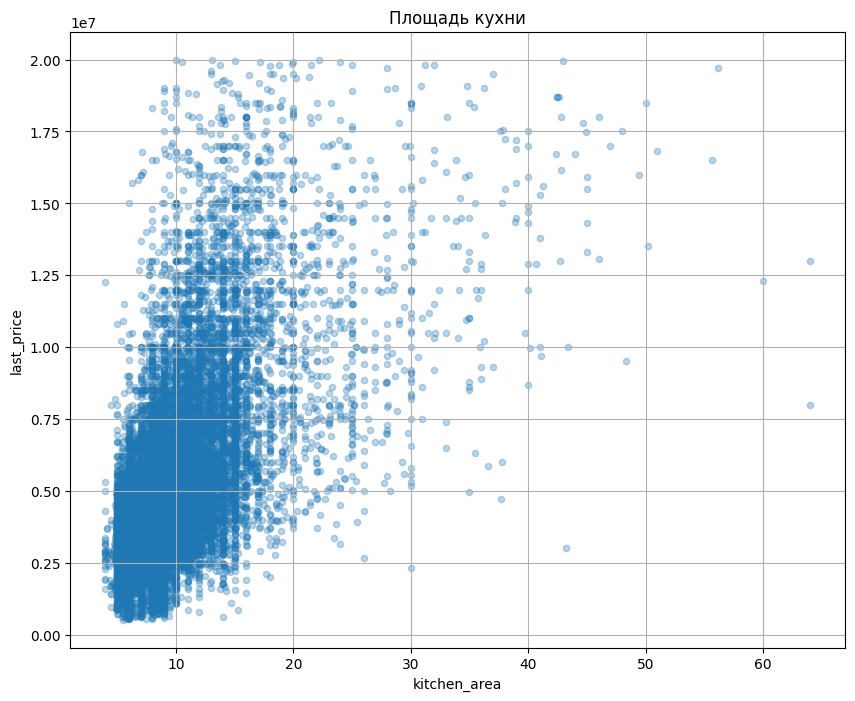

In [122]:
data_new_price.plot(x ='kitchen_area', y = 'last_price',
                    alpha=0.3, kind= 'scatter',title='Площадь кухни', grid=True,figsize=(10,8))
plt.show()

Кэффециент Пирсона для этой зависимости равен 0.58 говорит о умеренной корреляции между стоимостью 
квартиры и площадью кухни.  Связь между этими двумя параметрами является относительно слабой, что указывает на то, что изменения в площади кухни слабо объясняет изменения в стоимости квартиры.


Построим столбчатый график зависимости средней стоимости квартиры от числа комнат для визуализации.




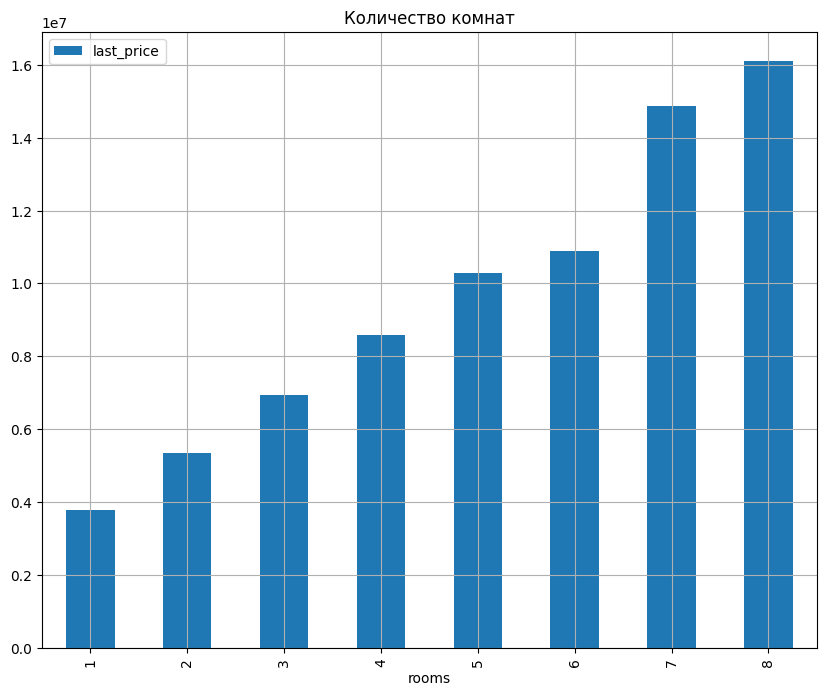

In [123]:
# построим график, используя pivot_table для группировки по 'rooms' среднего значения 'last_price'
data_new_price.pivot_table(index='rooms',values= 'last_price')\
              .plot( kind= 'bar',title='Количество комнат',grid=True,figsize=(10,8))
plt.show()

На графике прослеживается связь между числом комнат и стоимостью жилья. С увеличением их количества
цена жилья растет. Также можно предположить,что количество комнат связаны с общей площадью,
поэтому для корректного вывода рекомендуем изучить зависимость между ценой за 1кв.м. и 
количеством комнат.

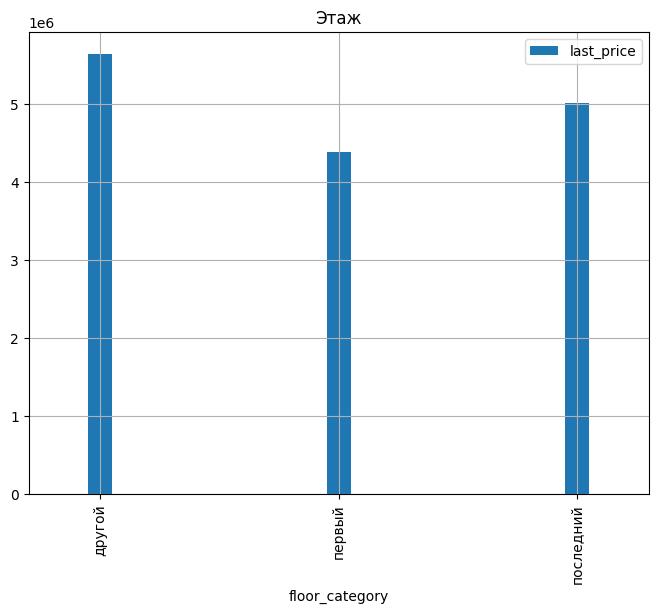

In [124]:
# построим график, используя pivot_table для группировки по 'floor_category'
# среднего значения 'last_price'.
data_new_price.pivot_table(index='floor_category',values= 'last_price')\
              .plot( kind= 'bar',title='Этаж',grid=True,figsize=(8,6),width=0.1)
plt.show()

Стоимость квартиры на первом и последнем этажах ниже, чем в категории 'другой'. Кроме того
стоимость квартир  на первом этаже немного ниже стоимости квартир на последнем этаже.
Эти наблюдения показывают влияние этажа на цену жилья, где первый и последний этажи часто представляются более доступными в сравнении с остальными этажами.

Построим графики, чтобы визуализировать зависимость стоимости квартир от даты размещения объявлений.
После этого подведем общий итог.

Для наглядности применим логорифмический масштаб

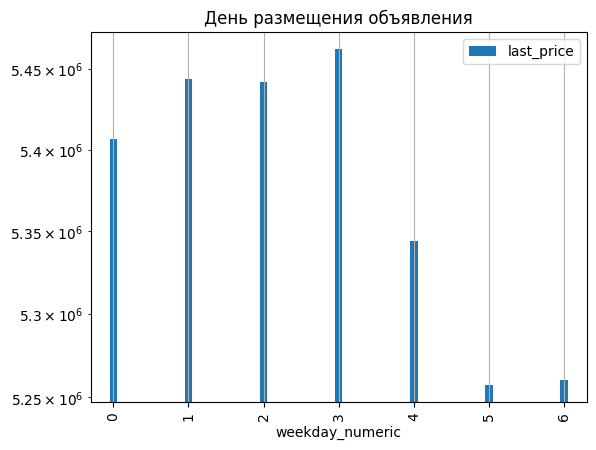

In [125]:
# построим график, используя pivot_table для группировки по 'weekday_numeric', logy=True
# среднего значения 'last_price'.
data_new_price.pivot_table(index='weekday_numeric',values= 'last_price')\
    .plot( kind= 'bar',title='День размещения объявления',grid=True,width=0.1,logy=True)
plt.show()

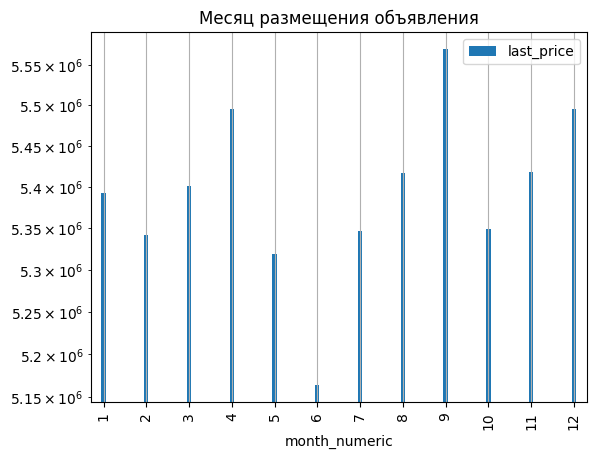

In [126]:
# построим график, используя pivot_table для группировки по 'month_numeric', logy=True
# среднего значения 'last_price'.
data_new_price.pivot_table(index='month_numeric',values= 'last_price')\
    .plot( kind= 'bar',title='Месяц размещения объявления',grid=True,width=0.1,logy=True)
plt.show()

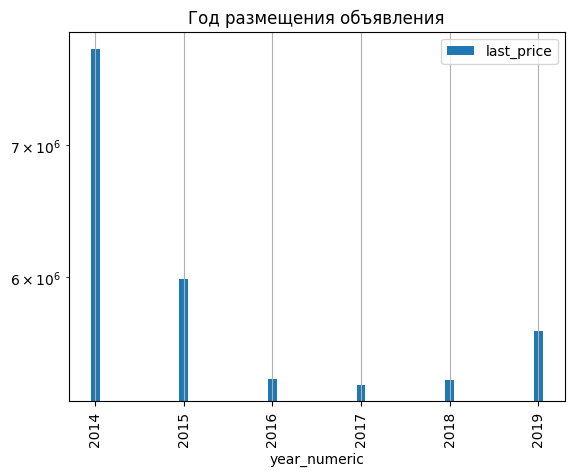

In [127]:
# построим график, используя pivot_table для группировки по 'year_numeric', logy=True
# среднего значения 'last_price'.
data_new_price.pivot_table(index='year_numeric',values= 'last_price')\
    .plot( kind= 'bar',title='Год размещения объявления',grid=True,width=0.1,logy=True)
plt.show()

Из анализа графиков можно сделать следующие выводы:  
1. Объявления, размещенные в выходные дни имеют более низкую стоимость, чем размещенные в будние дни.
2. Наиболее высокая цена у размещений в сентябре, декабре и апреле.Самая низкая стоимость при 
   размещении в июне стенденцией плавного увеличения к сентябрю.
3. График размещения объявлений по годам отражает историческую динамику средних цен на жилье. Наивысший уровень цен был достигнут в 2014 году. Впоследствии произошло резкое падение, выделяющееся на графике минимумом в 2017 году с тенденцией к восстановлению последующие периоды.

Выявленные аномально низкие значения высоты потолков, вероятно, связаны с ошибками в данных. Обнаружено, что эти значения относятся к квартирам в многоэтажных домах с параметрами (общей площадью, площадью кухни, жилой площадью), находящимися в пределах средних статистических данных.

Для повышения достоверности данных удалим аномально низкие и высокие значения высоты потолков. 

Исследование зависимостей стоимости квартир выявило несколько ключевых закономерностей:
1. Сильная положительная корреляция выявлена между ценой квартиры и общей площадью, жилая площадь и площадь кухни имеют умеренную положительную
корреляцию.
2. Стоимость квартиры на первом и последнем этажах ниже, чем в категории 'другой'.
3. С увеличением числа комнат цена квартир растет.
4. Более высокие цены наблюдались в сентябре, декабре и апреле, самая низкая стоимость отмечалась в июне.
5. День размещения также влияет на стоимость жилья, в будние дни цена жилья выше, чем в выходные.

#### Средняя цена квадратного метра в 10 популярных населенных пунктах

Создадим список населенных пунктов  с наибольшим числом записей, такаие населенные пункты будем считать наиболе популярными.

In [128]:
list_popular_country=data_new['locality_name'].value_counts().head(10).index.tolist()
list_popular_country

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'поселок Кудрово',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Гатчина',
 'поселок Парголово',
 'Выборг']

Создадим сводную таблицу с этими населенными пунктами и соответствущей им средней стоимости кв.м.

In [129]:
# oтфильтруем таблицу data_new по внешнему списку 'list_popular_country'.
# выведем сводную таблицу, сгруппировнную по столбцу 'locality_name' со средними значениями.
# столбца'square_meter_price'.
(data_new
          .query('locality_name.isin(@list_popular_country)')
        .pivot_table(index='locality_name', values='square_meter_price')
        .round(0).sort_values(by='square_meter_price',ascending = False)
)
   

square_meter_price
locality_name                        
Санкт-Петербург              108586.0
Пушкин                       102525.0
поселок Кудрово               95779.0
поселок Парголово             90781.0
поселок Мурино                85918.0
поселок Шушары                78491.0
Колпино                       75432.0
Гатчина                       68952.0
Всеволожск                    67780.0
Выборг                        58591.0

Самая высокая стоимость квадратного метра в Санкт-Петербурге - 108619 р. за м.кв.

Самая низкая стоимость квадратного метра в Выборге           - 58473 р. за м.кв.

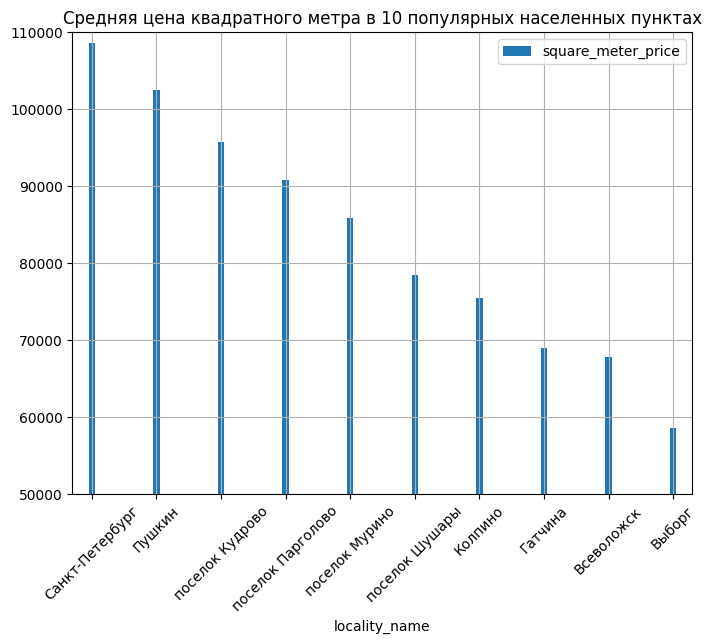

In [130]:
# построим столбчатый график для сводной таблицы
(data_new
          .query('locality_name.isin(@list_popular_country)')
        .pivot_table(index='locality_name', values='square_meter_price')
        .round(0).sort_values(by='square_meter_price',ascending = False)
        .plot(kind='bar',grid = True,width=0.1,rot=45,figsize=(8,6),
              title='Средняя цена квадратного метра в 10 популярных населенных пунктах')
)
plt.ylim(50000,110000)
plt.show()

#### Средняя цена квартир Санкт-Петербурга  на разном удалении от центра

Создадим для анализа data_new_piter. Сохраним в него строки с названием Санкт-Петербург.
Удалим пропуски и округлим значения в столбце `citycenters_nearest_km`. Нулевые значения изменим на 1. Создадим сводную таблицу и посторим график зависимости средней цены от расстояния до центра. 


In [131]:
# создадим data_new_piter и сохраним в нем срез  со значением в locality_name Санкт-Петербург.
# удалим пропуску в 'citycenters_nearest_km' и округлим значения.
data_new_piter=data_new.query('locality_name == "Санкт-Петербург" ')\
.dropna(subset=['citycenters_nearest_km']).round()
#  изменим нулевые значения в 'citycenters_nearest_km' на 1.
data_new_piter['citycenters_nearest_km'] = data_new_piter['citycenters_nearest_km']\
.where(data_new_piter['citycenters_nearest_km'] != 0 ,1)


In [132]:
# выведем сводную таблицу, сгруппировнную по столбцу 'citycenters_nearest_km' со средними значениями.
# 'last_price'.
data_new_piter.pivot_table(index='citycenters_nearest_km', values='last_price')\
.style.format("{:.0f}")

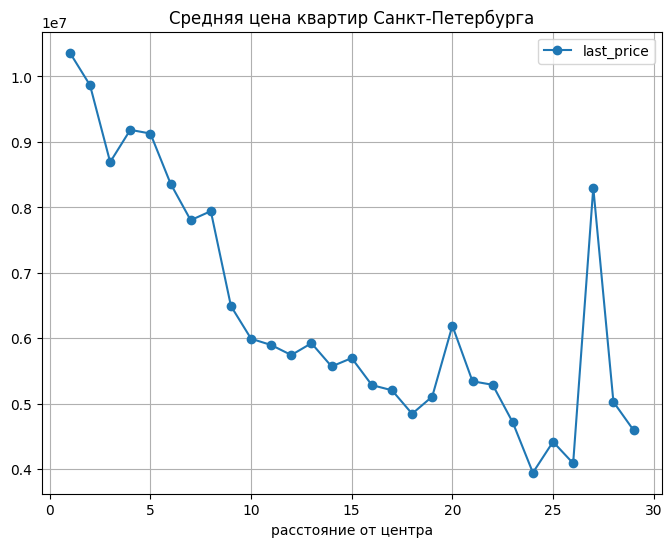

In [133]:
# график pivot_table сгруппированной по 'citycenters_nearest_km' со средним значением
# столбца 'last_price'
(
data_new_piter.pivot_table(index='citycenters_nearest_km', values='last_price')
.plot(grid=True, figsize=(8,6),style='o-',
      title='Средняя цена квартир Санкт-Петербурга', xlabel='расстояние от центра')
)
plt.show()

Прослеживается очевидная зависимость стоимости квартир от расстояния до центра. Характер этой зависимости следующий: чем дальше жилье от центра, тем ниже его стоимость. Однако стоит отметить интересное явление – на расстоянии в 27 км от центра наблюдается локальный максимум стоимости. Это явление, вероятно, может быть объяснено особенностями застройки, историческими контекстами или ландшафтными особенностями в данном районе.

 ### Общий вывод

На  этапе подработки данных заполнили   там где возможно пропуски в столбцах, привели  котегориальные
типы данных  к целочисленному виду, пропуски в столбце с названием населенных пунктов были удалены, cтолбец `is_apartment` приведен к булеву виду. Данные  проверены и очищены от
 неявных дубликатов.
Поступившие данные от геосервисов содержат неслучайные пропуски. Они объясняются как
отсутствием данных, предоставленным пользователем, так и особенностями алгоритмов расчета
целевых параметров. Данные, вписанные пользователем в большинстве случаев носят случайный характер.

Для улучшения процесса сбора данных рекомендуем формализовать ввод пользовательских данных, (например выбор из списка значений), а такжеприменить алгоритмы поиска ошибок на этапе ввода Это может снизить вероятность появления случайных ошибок в данных. Кроме того, предлагаем оптимизировать алгоритмы расчета в геосервисах для повышения их эффективности.

На этапе изучения данных были выявленны аномальные и экстремальны значения в следующих данных:
стоимость квартиры, высота потолков, этажность дома  жилая площадь и площадь кухни.
Провели очистку данных с исправлением аномалий, где это было возможно. Изменения и улучшения внесены в новую таблицу **data_new**, которая теперь содержит более корректные и надежные данные для последующего анализа.

В результате анализа времени продажи квартир сделаны следующие выводы:

**Среднее время продажи:**  
Среднее время продажи квартир составило 88 дней.

**Оценка продаж по длительности:**
1. Продажи, которые заняли более 500 дней, считаются необычайно долгими.
2. Для определения средних продаж использована величина квартильного размаха, равная 145 дням.
3. Продажи, завершенные в течение 39 дней, считаются быстрыми.
4. Медленными считаются продажи, длительностью от 184 до 500 дней.

В ходе исследования стоимости квартир мы **выявили сильную положительную корреляцию между ценой квартиры и таким параметром, как общая площадь**. Это говорит о том, что увеличение общей площади ведет к  росту стоимости жилья. 

Жилая площадь и площадь кухни не оказывают столь существенного влияния на цену квартир.

Этаж также влияет на стоимость этаж квартиры. **На первых и последних этажах цена ниже**.

В процессе анализа зависимости стоимости квартир от месяца размещения объявлений мы выявили, что самые высокие цены наблюдались в сентябре, декабре и апреле. Самая низкая стоимость, в свою очередь, отмечена в июне. 
Также обнаружено, что цены на квартиры, размещенные в выходные дни, ниже, чем в будние.


Изучив среднюю стоимость квартир в наиболее популярных населенных пунктах, получили
следующие данные:
1. Самая высокая стоимость квадратного метра в Санкт-Петербурге - 108619 р. за м.кв.
2. Самая низкая стоимость квадратного метра в Выборге - 58473 р. за м.кв.

При изучении зависимости стоимости жилья от расстояния до центра города мы обнаружили следующую закономерность:
**чем больше расстояние от центра, тем ниже стоимость жилья**.

Рекомендуется провести дополнительное исследование, направленное на изучение зависимости стоимости жилья от других ключевых параметров. Особенно важным будет анализ влияния совокупности параметров на конечную стоимость квартир.Такой подход позволит более глубоко понять, как различные характеристики квартир взаимодействуют и влияют на их цены.



